In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u

In [2]:
hdu = fits.open('milliquas.fits')
sdssQSO=hdu[1].data
print sdssQSO.columns

#c = SkyCoord(ra=sdssQSO['RA']*u.degree, dec=sdssQSO['DEC']*u.degree)  
c = SkyCoord(ra=sdssQSO['RAJ2000']*u.degree, dec=sdssQSO['DEJ2000']*u.degree)  


ColDefs(
    name = '_Glon'; format = 'F12.8'; unit = 'deg'; start = 2
    name = '_Glat'; format = 'F12.8'; unit = 'deg'; start = 15
    name = 'RAJ2000'; format = 'F10.6'; unit = 'deg'; start = 28
    name = 'DEJ2000'; format = 'F10.6'; unit = 'deg'; start = 39
    name = 'Name'; format = 'A25'; start = 50
    name = 'Cl_Ass'; format = 'A4'; start = 76
    name = 'Rmag'; format = 'F5.2'; unit = 'mag'; start = 81
    name = 'Bmag'; format = 'F5.2'; unit = 'mag'; start = 87
    name = 'Com'; format = 'A3'; start = 93
    name = 'R'; format = 'A1'; start = 97
    name = 'B'; format = 'A1'; start = 99
    name = 'z'; format = 'F6.3'; start = 101
    name = 'Qpct'; format = 'I3'; unit = 'pct'; start = 108
    name = 'XName'; format = 'A22'; start = 112
    name = 'RName'; format = 'A22'; start = 135
    name = 'recno'; format = 'I8'; start = 158
)


In [3]:
print sdssQSO[0]

(111.28604017, -26.18803981, 0.000629, 35.517844, 'WISEA J000000.15+353104.1', 'q', 17.93, 19.0, 'pG', '-', '-', 1.0, 100, '', '', 1)


In [5]:
hdu2 = fits.open('starcat_allscans_06_12_19.fits')
uvgaps = hdu2[1].data
print uvgaps.columns
cgaps = SkyCoord(ra=uvgaps['ALPHA_J2000']*u.degree, dec=uvgaps['DELTA_J2000']*u.degree)

ColDefs(
    name = 'plane_number'; format = 'J'
    name = 'NUMBER'; format = 'J'
    name = 'X_IMAGE'; format = 'D'
    name = 'Y_IMAGE'; format = 'D'
    name = 'ALPHA_J2000'; format = 'D'
    name = 'DELTA_J2000'; format = 'D'
    name = 'FLUX_AUTO'; format = 'D'
    name = 'FLUXERR_AUTO'; format = 'D'
    name = 'FLUX_APER'; format = 'D'
    name = 'A_IMAGE'; format = 'D'
    name = 'B_IMAGE'; format = 'D'
    name = 'THETA_IMAGE'; format = 'D'
    name = 'FWHM_IMAGE'; format = 'D'
    name = 'nuv'; format = 'D'
    name = 'gl'; format = 'D'
    name = 'gb'; format = 'D'
    name = 'expsum'; format = 'D'
    name = 'ctsum'; format = 'E'
    name = 'bkgdsum'; format = 'D'
)


In [6]:
hdu2 = fits.open('plane_gaiadr2_dust_06_12_19.fits')
uvgaps = hdu2[1].data
print uvgaps.columns
cgaps = SkyCoord(ra=uvgaps['ra_plane']*u.degree, dec=uvgaps['dec_plane']*u.degree)

ColDefs(
    name = 'solution_id'; format = 'K'
    name = 'source_id'; format = 'K'
    name = 'ra_gaia'; format = 'D'
    name = 'ra_error'; format = 'D'
    name = 'dec_gaia'; format = 'D'
    name = 'dec_error'; format = 'D'
    name = 'parallax'; format = 'D'
    name = 'parallax_error'; format = 'D'
    name = 'pmra'; format = 'D'
    name = 'pmdec'; format = 'D'
    name = 'visibility_periods_used'; format = 'I'
    name = 'duplicated_source'; format = 'L'
    name = 'phot_g_mean_flux'; format = 'D'
    name = 'phot_g_mean_flux_error'; format = 'D'
    name = 'phot_g_mean_mag'; format = 'D'
    name = 'phot_bp_mean_flux'; format = 'D'
    name = 'phot_bp_mean_flux_error'; format = 'D'
    name = 'phot_bp_mean_mag'; format = 'D'
    name = 'phot_rp_mean_flux'; format = 'D'
    name = 'phot_rp_mean_flux_error'; format = 'D'
    name = 'phot_rp_mean_mag'; format = 'D'
    name = 'radial_velocity'; format = 'D'
    name = 'radial_velocity_error'; format = 'D'
    name = 'rv_template

In [7]:
zrange = [0, 3]
declim = -90
gb=c.galactic.b.degree
gl=c.galactic.l.degree

#p=np.where((sdssQSO['Z']>zrange[0]) & (sdssQSO['Z']<zrange[1]) & (sdssQSO['RAJ2000'] > -90) & (sdssQSO['Cl'] == 'Q'))
#p=np.where((gb<10) & (gb > (-10)) & (sdssQSO['Z']>zrange[0]) & (sdssQSO['Z']<zrange[1]) & (sdssQSO['DEJ2000'] > declim) & (sdssQSO['Cl'] == 'Q'))
p=np.where((gb<10) & (gb > (-10)) & (sdssQSO['Z']>zrange[0]) & (sdssQSO['Z']<zrange[1]) & (sdssQSO['DEJ2000'] > declim))


In [8]:
nqso = len(gb[p])
for i in np.arange(nqso):
    data = dict(ra=sdssQSO['RAJ2000'][p][i],dec=sdssQSO['DEJ2000'][p][i],sdssgb=gb[p][i],sdssgl=gl[p][i],sdssz=sdssQSO['Z'][p][i],bmag=sdssQSO['Bmag'][p][i])
    print "{ra:8.3f} {dec:8.3f} {sdssgl:8.3f} {sdssgb:8.3f} {sdssz:8.3f} {bmag:6.2f}".format(**data)


   0.081   62.257  117.022   -0.027    0.700  19.11
   0.098   52.512  115.096   -9.581    1.900  19.77
   0.140   53.206  115.261   -8.907    2.600  20.45
   0.169   55.555  115.746   -6.607    1.500  19.71
   0.204   54.065  115.470   -8.072    2.100  20.47
   0.258   57.136  116.106   -5.066    2.300  18.75
   0.272   54.842  115.663   -7.318    0.900  20.24
   0.275   54.490  115.596   -7.663    1.900  17.93
   0.329   53.737  115.479   -8.407    0.700  20.03
   0.342   56.148  115.958   -6.044    1.500  18.92
   0.364   55.016  115.750   -7.157    0.700  19.36
   0.401   53.573  115.488   -8.577    1.300  16.76
   0.500   52.401  115.318   -9.738    1.500  18.70
   0.506   55.504  115.925   -6.694    1.000  20.50
   0.559   52.550  115.383   -9.599    1.400  20.25
   0.599   52.710  115.438   -9.446    0.400  20.48
   0.712   56.773  116.280   -5.470    0.700  20.43
   0.719   53.762  115.712   -8.428    0.100  19.35
   0.751   54.233  115.820   -7.969    2.300  20.16
   0.758   5

  12.536   53.026  122.734   -9.845    0.800  20.42
  12.712   55.197  122.847   -7.674    1.300  20.43
  12.740   56.781  122.866   -6.091    1.300  20.33
  12.750   54.853  122.868   -8.019    0.800  19.41
  12.771   54.663  122.880   -8.209    0.300  20.35
  12.777   55.746  122.885   -7.126    1.300  20.46
  12.797   54.832  122.896   -8.040    1.300  20.42
  12.810   54.179  122.903   -8.693    1.100  20.45
  12.873   54.284  122.940   -8.588    0.400  20.56
  12.908   55.687  122.960   -7.185    0.200  19.83
  12.939   54.986  122.978   -7.885    2.400  20.39
  12.943   53.057  122.983   -9.814    1.200  20.37
  12.952   71.252  122.962    8.380    2.500  20.74
  12.962   56.368  122.989   -6.503    0.900  19.77
  12.992   72.229  122.973    9.358    0.400  20.96
  13.064   55.787  123.048   -7.084    1.300  20.43
  13.159   53.944  123.110   -8.928    1.400  20.39
  13.266   52.950  123.180   -9.921    0.400  20.08
  13.363   72.140  123.088    9.269    1.500  20.53
  13.375   5

  23.121   53.636  129.067   -8.746    2.000  20.06
  23.145   52.526  129.262   -9.840    1.000  20.45
  23.158   53.098  129.176   -9.274    2.300  19.91
  23.182   54.665  128.935   -7.724    1.900  20.37
  23.186   53.010  129.207   -9.358    1.200  20.06
  23.232   54.634  128.969   -7.751    0.300  19.86
  23.336   54.042  129.127   -8.325    2.400  19.89
  23.340   53.993  129.137   -8.373    1.400  20.21
  23.345   53.025  129.301   -9.327    1.000  20.67
  23.350   53.369  129.246   -8.987    1.900  21.31
  23.382   52.783  129.363   -9.562    1.400  21.70
  23.384   52.839  129.355   -9.507    0.600  20.45
  23.391   72.446  126.139    9.837    0.200  21.02
  23.403   56.574  128.747   -5.820    0.600  19.92
  23.405   55.062  128.998   -7.312    1.800  20.07
  23.414   53.963  129.185   -8.395    0.800  20.20
  23.421   58.084  128.509   -4.330    1.600  20.74
  23.443   52.709  129.413   -9.629    2.000  19.75
  23.448   53.829  129.228   -8.525    2.200  20.81
  23.456   5

  26.322   53.460  130.990   -8.567    1.800  20.39
  26.323   53.904  130.897   -8.132    0.700  18.85
  26.333   53.136  131.065   -8.883    0.300  20.06
  26.345   55.339  130.606   -6.727    1.100  19.72
  26.345   57.821  130.086   -4.299    1.100  20.78
  26.364   58.920  129.867   -3.222    1.300  21.31
  26.368   59.045  129.843   -3.099    1.200  21.40
  26.370   53.395  131.032   -8.624    2.000  20.82
  26.383   60.142  129.622   -2.025    1.100  20.57
  26.389   59.252  129.810   -2.895    0.900  20.60
  26.394   60.206  129.614   -1.961    1.300  20.60
  26.396   56.256  130.442   -5.824    1.000  19.82
  26.401   59.539  129.757   -2.614    1.000  20.50
  26.408   54.450  130.830   -7.589    0.300  20.81
  26.416   57.779  130.132   -4.333    1.100  20.55
  26.426   56.567  130.392   -5.516    2.300  19.97
  26.427   53.624  131.017   -8.393    0.700  20.50
  26.432   56.820  130.343   -5.268    0.900  20.78
  26.437   57.753  130.149   -4.355    0.900  20.27
  26.447   5

  27.730   64.955  129.176    2.807    1.200  18.38
  27.738   65.029  129.163    2.879    1.100  18.28
  27.742   59.363  130.461   -2.636    1.100  18.58
  27.744   54.563  131.568   -7.307    0.300  20.51
  27.801   58.397  130.712   -3.569    1.900  21.37
  27.815   64.985  129.204    2.844    1.200  18.09
  27.826   57.102  131.024   -4.826    2.000  20.98
  27.832   58.534  130.696   -3.432    2.000  21.20
  27.838   58.891  130.617   -3.084    1.500  20.61
  27.838   59.177  130.551   -2.805    0.600  20.31
  27.859   53.122  131.972   -8.693    0.900  19.28
  27.859   57.428  130.966   -4.505    0.900  18.31
  27.870   59.048  130.597   -2.928    1.100  21.45
  27.870   58.057  130.826   -3.892    1.100  20.40
  27.883   59.721  130.448   -2.271    1.100  20.58
  27.885   54.077  131.762   -7.761    0.300  20.32
  27.905   59.600  130.487   -2.387    0.900  20.49
  27.923   59.060  130.620   -2.909    1.200  21.44
  27.971   59.051  130.647   -2.912    1.200  20.60
  28.013   5

  33.732   50.933  136.103   -9.792    0.800  20.16
  33.825   53.496  135.325   -7.346    0.300  20.85
  33.865   51.645  135.951   -9.091    0.400  17.47
  33.868   56.643  134.334   -4.357    2.300  20.68
  33.875   54.372  135.069   -6.507    1.000  20.04
  33.891   50.727  136.267   -9.954    0.800  19.90
  33.915   52.112  135.827   -8.639    2.000  19.41
  33.919   55.543  134.715   -5.389    0.700  20.10
  33.925   71.372  129.619    9.602    1.800  18.29
  33.932   52.015  135.869   -8.727    1.300  18.34
  33.932   68.498  130.560    6.884    2.000  18.72
  33.961   68.216  130.662    6.621    1.200  20.15
  34.015   53.904  135.300   -6.924    1.100  19.58
  34.044   52.240  135.861   -8.492    1.500  19.23
  34.053   53.992  135.292   -6.833    1.500  19.70
  34.110   67.938  130.805    6.375    0.900  22.16
  34.111   51.424  136.170   -9.250    0.029   0.00
  34.111   55.201  134.930   -5.678    0.300  19.44
  34.138   52.964  135.677   -7.789    1.800  19.65
  34.150   5

  37.829   61.906  134.401    1.279    0.300  18.09
  37.956   53.560  137.618   -6.425    1.100  19.90
  37.966   70.760  131.082    9.494    1.200  20.94
  37.975   71.017  130.984    9.733    1.400  18.33
  38.038   55.307  136.996   -4.791    0.800  20.18
  38.065   70.689  131.140    9.441    1.100  18.06
  38.091   55.280  137.034   -4.804    0.700  19.30
  38.108   70.577  131.197    9.343    0.100  22.38
  38.226   70.594  131.227    9.374    1.200  18.32
  38.245   52.283  138.272   -7.538    1.600  20.06
  38.250   51.066  138.749   -8.660    1.200  19.86
  38.260   51.587  138.552   -8.177    1.400  20.18
  38.275   53.456  137.834   -6.448    2.100  20.26
  38.278   51.466  138.609   -8.285    1.700  20.10
  38.286   50.372  139.042   -9.291    1.600  20.05
  38.361   70.718  131.220    9.506    1.200  18.16
  38.382   54.741  137.396   -5.238    0.200  19.30
  38.406   68.003  132.298    7.009    1.200  21.25
  38.422   49.712  139.383   -9.866    1.200  19.77
  38.428   5

  48.146   46.703  146.620   -9.575    2.300  20.02
  48.155   52.165  143.769   -4.901    0.900  19.47
  48.268   46.189  146.965   -9.969    0.800  16.64
  48.357   49.902  145.057   -6.770    1.500  19.90
  48.361   47.171  146.499   -9.099    1.500  20.64
  48.370   53.918  142.972   -3.334    0.800  20.96
  48.388   49.383  145.347   -7.203    1.000  20.29
  48.394   53.286  143.312   -3.867    1.700  21.03
  48.537   63.403  138.123    4.821    1.000  21.38
  48.539   47.186  146.595   -9.022    1.100  16.73
  48.540   50.227  144.987   -6.432    0.500  20.66
  48.564   67.321  136.072    8.168    1.700  21.34
  48.579   51.714  144.228   -5.150    0.200  17.45
  48.595   59.249  140.312    1.289    1.000  14.99
  48.667   50.698  144.809   -5.988    0.700  21.23
  48.701   51.247  144.539   -5.510    0.200  19.97
  48.881   51.245  144.636   -5.452    0.500  20.37
  48.931   68.257  135.691    9.036    0.700  21.12
  48.945   48.348  146.210   -7.892    1.500  21.28
  48.948   5

  54.061   46.338  150.243   -7.611    1.100  20.65
  54.069   45.438  150.785   -8.333    1.400  20.50
  54.103   44.577  151.322   -9.012    1.800  19.21
  54.106   44.884  151.139   -8.763    0.800  19.49
  54.113   45.226  150.937   -8.485    1.200  20.48
  54.126   48.334  149.091   -5.974    2.000  20.94
  54.128   44.131  151.605   -9.360    0.700  19.86
  54.144   46.831  149.995   -7.179    0.500  21.63
  54.167   46.421  150.252   -7.500    1.000  20.81
  54.177   44.023  151.698   -9.425    0.800  20.93
  54.189   44.374  151.494   -9.138    0.700  18.92
  54.211   48.996  148.744   -5.407    1.300  20.79
  54.212   46.616  150.161   -7.325    0.900  20.87
  54.254   47.496  149.659   -6.599    1.200  21.15
  54.262   47.647  149.573   -6.474    0.184  17.08
  54.268   48.314  149.179   -5.935    1.500  21.52
  54.305   46.820  150.090   -7.123    1.300  21.66
  54.305   43.692  151.974   -9.636    1.000  19.95
  54.367   46.877  150.091   -7.052    1.700  21.26
  54.379   4

  59.595   40.219  157.292   -9.865    1.200  20.43
  59.599   42.747  155.615   -7.955    0.400  20.92
  59.616   45.707  153.678   -5.705    0.600  20.95
  59.631   45.815  153.615   -5.616    1.400  20.55
  59.635   40.666  157.017   -9.508    1.500  20.72
  59.683   58.112  145.641    3.754    2.900  20.68
  59.686   42.522  155.813   -8.083    1.500  19.36
  59.742   40.773  157.007   -9.374    1.300  20.67
  59.754   62.709  142.654    7.260    2.000  21.44
  59.761   60.089  144.380    5.280    0.455  21.52
  59.804   40.289  157.367   -9.707    0.700  20.67
  59.807   45.830  153.698   -5.525    1.000  19.30
  59.818   40.580  157.180   -9.482    1.500  20.94
  59.844   49.665  151.209   -2.602    1.200  17.92
  59.874   50.964  150.377   -1.604    1.520  22.78
  59.915   42.315  156.079   -8.128    0.700  20.63
  59.952   45.208  154.185   -5.929    1.300  20.99
  59.989   63.758  142.039    8.121    2.200  20.51
  59.994   43.184  155.546   -7.436    2.300  20.97
  59.997   5

  65.653   36.403  163.449   -9.354    1.000  21.26
  65.658   36.606  163.305   -9.210    1.100  21.69
  65.664   36.768  163.190   -9.094    1.100  18.49
  65.665   35.845  163.863   -9.735    0.500  22.08
  65.675   43.739  158.184   -4.208    1.300  20.46
  65.681   53.406  151.322    2.607    1.273   0.00
  65.683   36.619  163.309   -9.187    1.200  21.85
  65.692   36.546  163.367   -9.232    0.600  22.18
  65.706   56.013  149.476    4.452    1.300  18.13
  65.708   42.403  159.154   -5.129    1.700  21.19
  65.716   56.709  148.983    4.944    1.200  20.85
  65.718   36.185  163.645   -9.468    1.100  21.79
  65.720   35.876  163.872   -9.682    1.600  21.55
  65.722   36.431  163.468   -9.295    0.900  21.18
  65.728   52.604  151.912    2.062    0.700  21.17
  65.733   35.771  163.956   -9.747    1.000  21.11
  65.736   35.940  163.834   -9.628    1.000  20.75
  65.736   36.041  163.761   -9.558    1.400  20.99
  65.741   36.689  163.291   -9.105    1.200  18.25
  65.766   3

  70.716   49.945  155.986    2.539    0.100  18.47
  70.718   33.107  168.750   -8.485    0.300  20.34
  70.728   51.000  155.193    3.238    0.500  20.81
  70.750   57.303  150.407    7.364    1.400  20.25
  70.754   58.145  149.762    7.913    1.000  21.14
  70.756   49.364  156.440    2.178    1.800  21.37
  70.760   40.866  162.855   -3.400    0.800  20.24
  70.800   37.689  165.286   -5.455    0.600  20.83
  70.816   39.624  163.824   -4.180    0.700  21.01
  70.840   57.375  150.384    7.448    1.600  21.81
  70.848   58.064  149.858    7.898    1.200  20.93
  70.851   60.181  148.225    9.267    1.200  20.47
  70.949   58.075  149.884    7.946    1.800  20.58
  70.957   57.646  150.217    7.671    1.100  20.33
  70.961   30.515  170.892   -9.998    1.800  20.66
  70.963   55.479  151.881    6.269    1.700  20.00
  70.965   57.130  150.616    7.341    1.100  20.73
  70.986   35.141  167.331   -6.998    0.400  21.10
  71.014   57.167  150.605    7.385    1.100  21.32
  71.023   5

  74.855   35.792  168.825   -4.145    0.700  20.95
  74.873   58.534  150.826    9.842    1.200  18.41
  74.884   54.225  154.293    7.232    0.600  21.11
  74.908   38.661  166.589   -2.343    1.800  20.77
  74.909   28.984  174.270   -8.276    1.100  20.34
  74.949   32.825  171.224   -5.906    0.200  20.33
  74.984   27.101  175.828   -9.364    0.061  18.26
  74.987   30.513  173.087   -7.292    0.800  20.94
  74.989   41.494  164.398   -0.545    1.600  20.66
  74.989   36.920  168.001   -3.365    0.700  20.59
  75.006   31.039  172.676   -6.959    1.200  20.33
  75.048   47.861  159.408    3.413    2.300  17.53
  75.118   26.100  176.711   -9.871    0.800  20.74
  75.125   47.836  159.459    3.438    0.400  18.47
  75.152   26.103  176.727   -9.844    1.100  20.70
  75.163   42.934  163.343    0.444    0.400  21.01
  75.197   58.101  151.280    9.717    2.000  22.39
  75.213   53.341  155.119    6.848    1.600  21.52
  75.235   57.345  151.905    9.279    1.800  20.72
  75.240   3

  76.987   42.941  164.149    1.509    1.800  20.67
  76.988   24.312  179.190   -9.566    1.400  18.58
  76.989   27.098  176.906   -7.932    1.000  20.65
  76.994   26.099  177.725   -8.516    1.200  21.69
  76.994   26.647  177.277   -8.194    0.800  21.73
  76.996   24.645  178.920   -9.365    2.000  20.96
  76.997   25.298  178.383   -8.983    1.000  20.69
  77.003   25.470  178.245   -8.878    1.000  18.47
  77.014   51.695  157.107    6.738    0.900  20.50
  77.023   25.363  178.344   -8.926    1.300  21.68
  77.024   26.472  177.435   -8.275    1.100  21.03
  77.025   26.092  177.747   -8.498    1.200  21.76
  77.028   26.411  177.488   -8.308    1.300  22.03
  77.030   26.144  177.708   -8.463    1.900  22.56
  77.030   26.417  177.484   -8.303    1.200  20.35
  77.039   37.038  168.902   -1.993    0.100  16.08
  77.039   25.252  178.444   -8.979    1.100  21.18
  77.041   25.974  177.852   -8.555    1.200  20.55
  77.055   26.543  177.394   -8.211    2.400  20.78
  77.057   2

  78.261   25.510  178.879   -7.931    1.200  20.55
  78.300   44.408  163.528    3.143    1.600  20.97
  78.302   48.603  160.112    5.593    0.800  20.55
  78.340   25.312  179.085   -7.986    1.200  22.06
  78.359   22.653  181.299   -9.496    0.900  20.60
  78.361   25.785  178.706   -7.698    1.300  18.08
  78.368   26.307  178.279   -7.392    1.200  18.10
  78.384   40.428  166.792    0.860    1.200  19.72
  78.409   53.482  156.140    8.468    1.700  20.63
  78.410   25.350  179.090   -7.912    1.200  21.59
  78.411   52.670  156.812    8.002    1.700  21.05
  78.423   25.160  179.254   -8.012    1.200  21.59
  78.427   25.699  178.811   -7.699    1.200  18.00
  78.431   25.724  178.793   -7.682    1.200  18.51
  78.442   23.525  180.618   -8.936    0.700  19.41
  78.446   54.860  155.008    9.274    0.400  21.07
  78.464   25.916  178.651   -7.547    1.200  18.58
  78.468   27.205  177.592   -6.801    1.200  18.51
  78.479   25.539  178.970   -7.753    1.000  21.45
  78.485   2

  79.897   27.309  178.237   -5.700    1.200  18.26
  79.903   27.673  177.939   -5.489    1.000  20.45
  79.909   22.996  181.831   -8.125    1.500  20.72
  79.933   28.428  177.330   -5.038    1.000  20.72
  79.944   24.853  180.300   -7.054    2.100  20.65
  79.948   20.198  184.201   -9.656    1.300  20.64
  79.949   28.569  177.223   -4.946    1.100  20.62
  79.955   20.741  183.747   -9.349    1.700  20.92
  79.960   28.327  177.428   -5.076    0.900  20.63
  79.970   48.805  160.581    6.611    1.800  20.56
  79.979   27.530  178.096   -5.514    1.100  20.90
  79.981   23.665  181.310   -7.695    1.700  20.65
  79.986   53.622  156.559    9.320    1.400  21.64
  79.986   27.313  178.280   -5.632    2.200  18.14
  79.987   28.718  177.118   -4.834    1.100  21.10
  79.988   53.508  156.655    9.258    0.400  20.86
  79.996   50.572  159.119    7.619    0.300  20.34
  79.999   39.026  168.654    1.061    2.300  18.23
  80.001   52.280  157.692    8.579    0.400  20.90
  80.004   2

  81.313   47.705  162.002    6.738    2.200  20.60
  81.321   27.077  179.145   -4.782    1.200  20.42
  81.325   27.243  179.009   -4.687    1.100  20.58
  81.326   27.743  178.592   -4.407    1.200  20.38
  81.328   26.925  179.275   -4.862    1.000  18.10
  81.329   27.973  178.403   -4.277    1.200  21.70
  81.335   27.104  179.130   -4.757    1.100  21.26
  81.337   42.922  166.008    4.096    0.800  19.30
  81.349   29.035  177.529   -3.670    1.700  21.23
  81.352   27.914  178.463   -4.293    0.900  19.43
  81.357   27.889  178.487   -4.304    1.000  20.99
  81.359   18.149  186.680   -9.668    1.900  22.04
  81.369   27.030  179.208   -4.772    1.300  18.88
  81.371   18.523  186.368   -9.454    0.200  21.18
  81.373   29.018  177.555   -3.663    1.600  21.78
  81.383   27.662  178.688   -4.411    1.200  18.40
  81.385   19.090  185.893   -9.135    1.100  18.37
  81.386   18.617  186.296   -9.392    1.700  22.28
  81.387   27.561  178.774   -4.464    1.200  18.94
  81.387   2

  82.480   27.706  179.190   -3.577    1.200  20.76
  82.481   44.578  165.079    5.699    0.032  13.24
  82.487   28.187  178.791   -3.308    2.100  24.53
  82.495   46.045  163.846    6.505    0.800  20.99
  82.496   27.823  179.100   -3.501    1.400  20.57
  82.496   27.432  179.427   -3.716    1.300  20.80
  82.496   27.674  179.225   -3.582    1.100  20.81
  82.498   29.300  177.865   -2.688    1.200  18.33
  82.500   27.877  179.057   -3.469    1.200  20.78
  82.503   29.874  177.387   -2.369    1.200  18.58
  82.503   18.326  187.123   -8.657    1.500  20.05
  82.513   17.040  188.228   -9.337    0.900  20.96
  82.513   33.732  174.171   -0.237    1.600  20.79
  82.514   48.045  162.159    7.598    0.800  20.59
  82.518   15.922  189.190   -9.928    0.700  19.61
  82.540   50.569  160.017    8.969    0.300  21.25
  82.546   27.851  179.101   -3.449    1.200  20.71
  82.549   47.308  162.797    7.220    0.900  21.04
  82.552   48.718  161.600    7.983    0.900  20.15
  82.559   1

  84.155   26.812  180.751   -2.812    0.700  20.74
  84.166   18.112  188.154   -7.433    1.700  22.04
  84.179   18.804  187.568   -7.057    0.800  20.42
  84.184   17.297  188.863   -7.846    0.600  20.61
  84.222   49.575  161.448    9.363    2.300  20.31
  84.230   46.521  164.085    7.773    0.600  20.34
  84.233   20.123  186.468   -6.317    1.800  21.38
  84.234   22.574  184.380   -5.016    2.300  20.68
  84.237   32.756  175.774    0.442    0.500  20.81
  84.239   42.004  167.950    5.392    0.900  20.14
  84.240   20.467  186.177   -6.130    1.200  21.07
  84.255   50.707  160.478    9.967    0.300  20.70
  84.265   19.728  186.821   -6.501    1.800  21.09
  84.284   19.206  187.276   -6.761    1.300  21.57
  84.292   28.271  179.584   -1.926    0.200  20.08
  84.297   14.484  191.346   -9.222    0.300  19.78
  84.308   22.779  184.242   -4.849    0.900  20.44
  84.314   34.896  174.003    1.644    0.200  14.95
  84.319   49.486  161.559    9.370    1.300  18.95
  84.320   4

  86.040   22.325  185.474   -3.728    0.600  20.20
  86.040   20.794  186.785   -4.523    1.000  20.40
  86.041   12.599  193.865   -8.734    1.900  20.40
  86.050   21.533  186.157   -4.132    1.700  21.56
  86.055   22.181  185.604   -3.791    1.200  20.64
  86.060   47.444  163.936    9.319    2.300  20.58
  86.064   30.942  178.135    0.795    0.400  20.66
  86.067   20.920  186.690   -4.437    0.600  21.80
  86.069   21.201  186.451   -4.289    0.700  21.62
  86.071   19.753  187.693   -5.039    1.300  21.54
  86.074   42.092  168.590    6.600    2.100  20.69
  86.086   19.368  188.031   -5.226    0.800  21.51
  86.091   16.662  190.364   -6.618    0.800  20.32
  86.092   21.321  186.359   -4.208    1.000  20.51
  86.107   20.506  187.065   -4.620    1.100  20.54
  86.110   25.283  182.981   -2.130    1.000  20.79
  86.112   41.533  169.088    6.337    1.500  20.69
  86.114   10.118  196.072   -9.923    1.300  20.19
  86.117   35.830  173.987    3.386    2.800  21.25
  86.120   1

  87.065   47.618  164.126    9.993    0.900  19.43
  87.067   44.783  166.620    8.586    0.300  20.36
  87.067   44.170  167.157    8.279    1.500  20.30
  87.081   39.156  171.521    5.755    1.000  20.02
  87.084   29.287  180.008    0.689    1.000  17.78
  87.093   22.119  186.156   -3.000    1.200  21.40
  87.099   41.198  169.758    6.803    1.800  20.60
  87.101   11.237  195.584   -8.523    1.500  20.25
  87.102   22.427  185.895   -2.834    1.200  18.29
  87.107   45.648  165.875    9.042    0.700  20.53
  87.107   10.897  195.884   -8.688    0.800  20.22
  87.112   21.477  186.717   -3.314    1.200  20.27
  87.117   22.172  186.122   -2.954    1.200  21.26
  87.122   44.147  167.196    8.301    1.300  20.11
  87.127   17.202  190.408   -5.490    1.300  21.12
  87.129   20.312  187.727   -3.899    0.600  18.76
  87.133   18.977  188.879   -4.579    0.600  19.98
  87.136   20.313  187.730   -3.893    1.400  19.80
  87.137   31.620  178.031    1.931    0.300  18.36
  87.143   1

  88.264   21.685  187.084   -2.287    1.200  19.90
  88.272    9.181  197.966   -8.541    1.700  20.46
  88.273   38.693  172.393    6.322    0.600  20.35
  88.275   21.701  187.077   -2.270    1.100  18.02
  88.284   10.244  197.038   -8.008    0.700  18.37
  88.295   39.711  171.514    6.844    0.700  20.18
  88.296   30.115  179.835    2.017    1.700  20.69
  88.296   40.220  171.069    7.097    0.700  21.33
  88.302   40.022  171.245    7.003    0.600  20.53
  88.312   21.884  186.936   -2.148    1.100  21.35
  88.320   17.026  191.140   -4.596    2.300  20.04
  88.320   22.023  186.819   -2.071    1.200  18.29
  88.320   15.560  192.412   -5.332    0.700  18.60
  88.326   42.167  169.373    8.081    2.500  20.70
  88.329   14.407  193.419   -5.902    0.700  19.51
  88.329   32.527  177.767    3.263    0.700  20.14
  88.337   13.143  194.525   -6.525    0.700  20.04
  88.337   35.247  175.415    4.640    0.600  20.73
  88.342   37.668  173.314    5.857    0.800  20.69
  88.342   3

  89.742   40.419  171.438    8.156    0.700  20.17
  89.747    4.499  202.833   -9.528    1.200  21.43
  89.752   34.168  176.936    5.112    1.200  21.27
  89.756    4.093  203.199   -9.712    2.200  19.83
  89.764   10.242  197.760   -6.740    0.700  19.64
  89.764    5.543  201.912   -9.013    1.200  21.48
  89.767   43.814  168.431    9.800    0.800  20.27
  89.768   41.783  170.240    8.830    0.700  19.44
  89.769    9.443  198.465   -7.124    0.600  19.16
  89.771    5.073  202.333   -9.232    1.000  18.19
  89.779    3.821  203.452   -9.822    1.300  18.05
  89.784    4.891  202.501   -9.307    1.700  17.76
  89.789    5.469  201.989   -9.027    1.100  18.50
  89.790    3.852  203.430   -9.797    1.100  21.31
  89.793    3.568  203.686   -9.930    1.000  21.49
  89.794   11.358  196.794   -6.168    0.600  18.81
  89.795    3.772  203.505   -9.831    1.100  17.88
  89.797    3.575  203.681   -9.923    1.000  18.53
  89.800   13.190  195.193   -5.264    2.000  20.41
  89.809    

  90.182    5.443  202.202   -8.696    2.400  18.05
  90.184   12.033  196.390   -5.505    0.300  19.51
  90.187    5.629  202.039   -8.602    1.200  21.97
  90.188    9.781  198.370   -6.600    2.300  19.86
  90.194    7.600  200.296   -7.650    0.300  20.14
  90.202   32.411  178.657    4.575    2.200  20.73
  90.207    5.560  202.110   -8.618    1.500  20.12
  90.208   38.050  173.708    7.328    0.300  20.83
  90.209   34.078  177.201    5.397    0.700  20.96
  90.209    4.079  203.429   -9.322    1.200  21.55
  90.211   41.749  170.430    9.104    0.600  19.68
  90.212   36.260  175.287    6.463    0.700  20.64
  90.214    4.090  203.422   -9.312    1.000  20.95
  90.218    4.313  203.225   -9.202    1.000  21.16
  90.230   33.359  177.839    5.061    1.800  21.65
  90.231   41.303  170.834    8.905    0.700  20.44
  90.234   32.438  178.647    4.612    2.200  21.42
  90.241    7.622  200.299   -7.599    1.800  20.12
  90.244   32.379  178.702    4.590    1.900  20.95
  90.244    

  90.701    3.700  204.003   -9.069    1.300  21.63
  90.704    3.913  203.814   -8.966    1.000  21.00
  90.704   12.421  196.300   -4.872    0.300  18.45
  90.705    4.423  203.360   -8.723    1.100  21.40
  90.706   38.527  173.475    7.900    1.800  20.50
  90.707    9.960  198.462   -6.065    1.200  19.66
  90.710    1.717  205.781   -9.995    1.700  20.86
  90.712   32.201  179.052    4.848    1.100  21.59
  90.715   35.840  175.855    6.615    1.700  20.53
  90.720   42.576  169.872    9.828    2.700  20.55
  90.722    5.058  202.804   -8.407    1.200  21.41
  90.728    5.062  202.803   -8.400    1.000  18.34
  90.729    4.937  202.914   -8.458    1.200  21.74
  90.744    9.497  198.887   -6.257    1.000  19.63
  90.746   42.203  170.215    9.669    0.800  17.10
  90.746    4.102  203.666   -8.839    1.100  21.70
  90.755    5.682  202.265   -8.081    1.800  21.71
  90.757   21.986  187.981   -0.132    1.100  18.16
  90.759   37.893  174.057    7.633    0.700  20.17
  90.759    

  91.612   40.097  172.411    9.259    0.800  20.30
  91.615   11.471  197.567   -4.554    0.800  20.18
  91.620    0.717  207.110   -9.657    0.400  20.29
  91.622   32.802  178.897    5.811    2.000  20.62
  91.623   40.008  172.495    9.225    0.600  18.49
  91.624   24.724  185.984    1.903    1.100  20.37
  91.633   24.248  186.403    1.678    0.300  18.12
  91.633    6.023  202.382   -7.150    2.900  21.12
  91.635   35.091  176.879    6.914    1.000  19.69
  91.637    8.474  200.216   -5.977    0.200  20.38
  91.646    0.422  207.387   -9.771    1.400  22.18
  91.657   33.394  178.387    6.120    0.600  21.88
  91.665   35.076  176.904    6.928    1.100  20.68
  91.666    4.636  203.629   -7.778    1.200  21.41
  91.680    6.361  202.105   -6.949    0.700  20.89
  91.698   26.540  184.428    2.844    1.200  20.58
  91.700    4.378  203.875   -7.871    1.500  21.84
  91.700   11.745  197.367   -4.348    2.000  20.19
  91.702   37.346  174.902    8.031    0.700  19.94
  91.707    

  92.673   34.380  177.917    7.330    2.000  21.47
  92.677    5.174  203.631   -6.637    0.300  19.94
  92.677    6.299  202.633   -6.105    1.100  20.18
  92.681    0.586  207.725   -8.778    1.200  20.02
  92.684    6.621  202.351   -5.947    0.800  21.09
  92.685    4.416  204.307   -6.986    0.700  19.98
  92.686   35.228  177.165    7.736    2.000  22.01
  92.690   25.448  185.817    3.097    0.700  20.58
  92.692   35.046  177.330    7.655    1.700  21.24
  92.693   -1.536  209.640   -9.745    0.700  20.40
  92.700    1.507  206.909   -8.334    1.000  20.15
  92.705    2.215  206.279   -8.000    0.900  19.85
  92.707    4.984  203.814   -6.700    1.100  21.45
  92.713   39.305  173.520    9.644    0.800  20.19
  92.716    0.356  207.949   -8.853    1.800  20.47
  92.718    0.352  207.953   -8.853    1.700  21.03
  92.720   23.609  187.444    2.238    0.900  21.45
  92.725    6.156  202.782   -6.131    1.800  22.08
  92.727   -0.491  208.714   -9.235    0.500  21.60
  92.743   3

  93.568   35.083  177.633    8.308    1.500  19.61
  93.574   -0.863  209.443   -8.654    0.500  20.26
  93.578    0.440  208.276   -8.050    1.200  20.64
  93.587    5.423  203.839   -5.720    1.900  21.24
  93.588    7.755  201.774   -4.620    1.700  20.04
  93.590   -2.977  211.355   -9.604    2.000  21.77
  93.596    6.895  202.538   -5.019    0.600  19.40
  93.597   34.739  177.953    8.171    2.100  22.24
  93.609    1.435  207.399   -7.562    1.300  20.61
  93.612    5.668  203.633   -5.583    0.900  21.05
  93.612   24.802  186.784    3.523    1.000  18.47
  93.614   -1.529  210.061   -8.923    0.900  20.24
  93.618    7.070  202.394   -4.917    1.000  20.54
  93.621   -0.216  208.883   -8.314    1.500  20.95
  93.624    7.635  201.897   -4.645    1.200  20.05
  93.625    7.539  201.982   -4.690    1.100  19.84
  93.632   34.241  178.412    7.966    2.000  22.17
  93.632   33.858  178.755    7.790    1.900  20.63
  93.634    0.179  208.536   -8.120    2.200  20.43
  93.638    

  94.557   24.871  187.129    4.311    1.800  21.14
  94.557   33.932  179.045    8.505    1.800  20.66
  94.561    7.704  202.275   -3.794    0.800  19.90
  94.563    4.777  204.869   -5.163    0.700  20.45
  94.573   -4.455  213.141   -9.399    0.300  20.56
  94.589    8.131  201.910   -3.569    1.500  21.14
  94.590   20.589  190.928    2.322    2.300  15.11
  94.597   36.278  176.941    9.596    0.900  20.31
  94.615   33.735  179.244    8.459    1.200  20.79
  94.615    5.938  203.863   -4.575    1.200  21.27
  94.616   -4.013  212.762   -9.161    1.000  20.12
  94.619   26.154  186.018    4.961    2.400  22.07
  94.619   34.740  178.340    8.918    1.200  21.18
  94.632    6.464  203.405   -4.314    1.400  21.34
  94.639   -0.200  209.342   -7.403    1.400  20.85
  94.641   -0.298  209.431   -7.446    1.200  21.70
  94.651    0.539  208.687   -7.052    1.300  21.62
  94.654    0.388  208.823   -7.119    1.300  20.70
  94.656   33.363  179.594    8.320    1.200  20.71
  94.668    

  95.594   -1.150  210.634   -6.990    1.300  20.49
  95.594   35.086  178.390    9.788    0.800  20.61
  95.595   31.486  181.648    8.174    1.500  20.65
  95.595   26.336  186.264    5.821    1.300  20.42
  95.598   -6.493  215.452   -9.401    0.700  20.48
  95.599   26.034  186.535    5.685    1.700  20.49
  95.600   -6.181  215.169   -9.260    2.000  20.24
  95.600   26.609  186.023    5.951    1.200  21.04
  95.602   30.909  182.170    7.919    2.500  19.70
  95.608    6.555  203.779   -3.414    0.500  21.70
  95.608   30.820  182.253    7.883    1.200  19.63
  95.609    6.127  204.159   -3.613    1.100  21.17
  95.618    0.244  209.398   -6.329    1.000  20.73
  95.619   25.307  187.192    5.366    1.100  21.36
  95.627   26.129  186.462    5.751    1.800  21.36
  95.627    0.234  209.411   -6.326    1.000  20.73
  95.629    6.501  203.837   -3.421    1.200  21.21
  95.629   -3.440  212.708   -8.000    0.400  20.47
  95.638    6.161  204.142   -3.571    1.200  20.65
  95.639   3

  96.559   -2.310  212.117   -6.660    0.300  20.55
  96.565    6.806  204.000   -2.456    1.300  20.87
  96.569   20.039  192.283    3.706    0.400  20.40
  96.574    6.889  203.931   -2.409    1.400  19.41
  96.580    6.734  204.071   -2.476    1.100  21.36
  96.581    7.595  203.309   -2.075    1.000  20.05
  96.583    7.695  203.221   -2.027    1.000  21.22
  96.584   -0.325  210.352   -5.732    1.100  20.74
  96.591   -4.174  213.806   -7.476    0.100  19.93
  96.592    7.868  203.072   -1.938    0.800  22.06
  96.595   14.516  197.190    1.162    0.600  20.56
  96.595    0.420  209.691   -5.380    1.000  20.69
  96.602   12.052  199.374    0.019    0.200  19.06
  96.602   30.902  182.567    8.682    0.900  18.62
  96.603   26.862  186.208    6.863    0.800  20.61
  96.604    6.645  204.161   -2.496    1.100  18.33
  96.609   -9.600  218.727   -9.880    0.700  20.58
  96.613    7.458  203.445   -2.111    0.600  17.86
  96.616   16.744  195.226    2.217    1.600  19.51
  96.617   2

  97.251   26.043  187.208    7.010    1.800  20.86
  97.251    1.278  209.228   -4.404    1.200  18.17
  97.253   31.225  182.524    9.324    0.200  20.17
  97.263    0.955  209.522   -4.541    1.200  18.21
  97.264    1.290  209.223   -4.387    0.800  21.15
  97.267   20.624  192.064    4.556    1.900  20.47
  97.267   23.567  189.436    5.901    1.000  19.58
  97.272   29.867  183.764    8.739    1.500  20.06
  97.272    7.870  203.383   -1.341    1.100  19.98
  97.274    7.363  203.833   -1.574    1.200  18.43
  97.275    9.140  202.259   -0.749    1.600  21.72
  97.275    6.953  204.197   -1.763    1.100  18.23
  97.275   -5.495  215.305   -7.462    1.200  19.99
  97.276   26.279  187.006    7.136    1.800  20.87
  97.277   19.514  193.058    4.054    0.800  19.73
  97.281   24.993  188.164    6.560    1.900  21.97
  97.282   28.338  185.152    8.066    1.400  19.40
  97.282   -6.136  215.886   -7.743    0.800  20.60
  97.288   -4.889  214.765   -7.178    0.400  19.89
  97.289    

  98.416   17.404  195.434    4.048    0.800  19.92
  98.421    7.549  204.194   -0.480    1.400  18.43
  98.437   21.118  192.124    5.755    0.600  20.31
  98.440   20.985  192.244    5.697    1.200  20.54
  98.445   -5.849  216.151   -6.582    0.300  20.40
  98.448   24.683  188.923    7.366    1.100  19.24
  98.449   28.031  185.892    8.852    2.000  21.00
  98.454   21.483  191.803    5.934    0.300  18.09
  98.461   18.120  194.815    4.413    1.200  20.46
  98.463   28.876  185.128    9.234    0.400  19.35
  98.464   26.704  187.102    8.278    1.800  20.55
  98.466   30.342  183.792    9.875    1.500  20.02
  98.466    9.054  202.880    0.254    1.200  21.42
  98.467   -1.085  211.894   -4.404    1.100  18.14
  98.476   25.595  188.110    7.796    1.800  21.23
  98.484   26.925  186.910    8.392    0.300  17.67
  98.486   -8.097  218.195   -7.551    1.000  21.10
  98.490   27.821  186.099    8.792    1.100  19.36
  98.499    9.234  202.735    0.366    1.200  20.95
  98.501    

  99.781    0.148  211.395   -2.671    1.300  16.37
  99.787   27.408  186.984    9.646    1.200  19.55
  99.789   -7.416  218.163   -6.092    1.600  20.99
  99.793   24.170  189.935    8.237    1.800  19.21
  99.804   25.832  188.428    8.974    0.700  20.11
  99.809   15.115  198.089    4.197    0.700  20.04
  99.817  -12.807  223.045   -8.461    0.300  20.62
  99.824   26.639  187.701    9.342    1.800  20.24
  99.832   24.313  189.821    8.331    1.600  20.20
  99.841   27.974  186.486    9.933    1.800  21.19
  99.856  -13.901  224.056   -8.906    1.700  20.36
  99.864   16.565  196.815    4.900    0.500  20.05
  99.867   27.957  186.512    9.947    1.300  20.11
  99.874   21.108  192.738    6.948    1.700  18.68
  99.877   17.969  195.562    5.545    0.400  19.42
  99.882    0.391  211.225   -2.471    1.200  18.09
  99.882   22.705  191.298    7.664    1.700  20.52
  99.884   15.386  197.879    4.384    0.300  18.26
  99.914   10.374  202.362    2.128    1.100  18.27
  99.914   1

 101.106  -18.284  228.587   -9.724    1.100  21.00
 101.108   19.233  194.949    7.153    0.400  20.11
 101.112   -8.261  219.513   -5.300    1.300  20.32
 101.118   10.824  202.501    3.387    1.800  21.62
 101.124   21.498  192.905    8.165    1.800  20.53
 101.127   15.904  197.956    5.686    2.100  20.49
 101.129   21.907  192.535    8.348    1.300  18.81
 101.133   18.874  195.284    7.015    0.900  20.28
 101.133  -17.780  228.137   -9.484    1.800  21.64
 101.137  -17.788  228.146   -9.484    1.800  21.46
 101.137   20.154  194.128    7.585    0.400  19.67
 101.142   10.634  202.681    3.321    1.500  20.85
 101.145   10.300  202.981    3.172    1.600  22.03
 101.146   20.762  193.581    7.860    2.200  20.47
 101.153   12.177  201.308    4.029    1.600  19.47
 101.160   19.458  194.768    7.297    0.400  19.00
 101.165    6.111  206.722    1.282    2.200  17.49
 101.168  -18.375  228.695   -9.711    1.100  21.09
 101.171   12.305  201.200    4.103    1.800  20.76
 101.175   1

 102.365    8.015  205.567    3.209    0.800  19.69
 102.366   -0.980  213.580   -0.886    1.700  20.95
 102.368   12.735  201.344    5.340    0.200  19.60
 102.379   10.634  203.232    4.405    2.200  21.64
 102.384   17.487  197.067    7.468    0.200  20.12
 102.385  -17.259  228.187   -8.183    1.400  21.16
 102.387    5.624  207.709    2.142    2.000  20.53
 102.387   17.571  196.993    7.508    1.800  21.35
 102.387  -18.967  229.743   -8.925    1.500  21.77
 102.393   10.979  202.929    4.572    0.700  20.87
 102.394  -18.482  229.303   -8.708    1.200  21.02
 102.397   -0.288  212.977   -0.543    1.100  21.52
 102.398   20.390  194.437    8.752    1.500  20.62
 102.400    5.640  207.701    2.161    0.700  19.14
 102.406  -16.961  227.926   -8.034    1.000  20.71
 102.410  -19.037  229.816   -8.936    1.300  21.19
 102.416   -0.800  213.442   -0.759    2.200  18.95
 102.416  -16.902  227.876   -7.999    1.600  20.78
 102.425   -0.288  212.990   -0.518    1.200  20.88
 102.428   1

 103.170   11.731  202.598    5.591    1.600  21.26
 103.170   10.424  203.772    5.005    2.000  20.95
 103.171   11.773  202.561    5.611    0.900  20.39
 103.185   10.483  203.725    5.044    2.200  20.42
 103.185  -17.522  228.764   -7.612    1.200  21.35
 103.186   17.730  197.186    8.261    1.600  20.31
 103.187   11.248  203.039    5.390    2.200  20.60
 103.190   20.282  194.862    9.374    0.600  19.37
 103.192   18.249  196.716    8.493    1.100  20.02
 103.195   17.873  197.060    8.332    0.800  21.48
 103.196   10.976  203.287    5.276    1.100  19.28
 103.197   13.798  200.750    6.537    0.900  20.72
 103.198  -21.754  232.621   -9.446    0.900  21.73
 103.201   10.255  203.937    4.957    2.400  19.31
 103.209   13.294  201.208    6.323    0.800  19.58
 103.222   19.171  195.889    8.921    0.900  18.43
 103.224   11.321  202.990    5.455    0.600  19.86
 103.227  -17.369  228.643   -7.508    1.300  20.29
 103.230   16.872  197.984    7.924    1.467  19.59
 103.231  -2

 103.916   17.914  197.325    8.968    1.800  18.92
 103.920   12.585  202.158    6.628    1.900  20.21
 103.920  -22.504  233.599   -9.166    2.200  20.35
 103.921  -23.576  234.580   -9.629    1.000  19.37
 103.923   11.927  202.752    6.338    2.300  21.06
 103.923   15.700  199.342    8.007    1.700  20.96
 103.924   19.668  195.725    9.732    0.700  20.27
 103.925    5.413  208.593    3.410    1.000  20.57
 103.925    7.835  206.428    4.505    0.900  18.41
 103.927   15.385  199.630    7.872    1.000  19.68
 103.927  -24.334  235.277   -9.949    0.700  19.96
 103.927   12.205  202.504    6.466    1.600  20.54
 103.928   14.856  200.109    7.640    1.900  20.03
 103.934   15.975  199.097    8.136    2.000  21.71
 103.944    4.527  209.393    3.026    1.100  21.32
 103.950   11.444  203.200    6.146    1.800  20.50
 103.950   11.491  203.157    6.168    0.700  19.97
 103.953   16.469  198.656    8.369    0.200  19.56
 103.953  -15.344  227.128   -5.985    1.400  20.38
 103.954   1

 104.561  -17.608  229.428   -6.474    1.100  20.98
 104.563   13.414  201.689    7.557    0.800  20.86
 104.565  -22.410  233.776   -8.589    2.000  21.74
 104.566   17.273  198.182    9.248    1.600  19.84
 104.567   12.768  202.275    7.276    1.800  19.16
 104.568   10.654  204.183    6.337    1.400  20.27
 104.569    4.431  209.762    3.537    2.300  21.73
 104.570   12.038  202.936    6.954    2.000  21.39
 104.571    7.677  206.859    5.006    1.700  20.08
 104.572    7.467  207.047    4.912    1.200  20.87
 104.578    6.353  208.048    4.415    1.200  19.87
 104.581  -17.538  229.373   -6.426    0.700  20.49
 104.584   16.103  199.257    8.755    1.900  19.53
 104.585   17.624  197.869    9.416    1.100  19.70
 104.587   11.924  203.046    6.919    1.600  21.24
 104.590    8.556  206.078    5.418    1.300  20.10
 104.591    6.998  207.476    4.718    1.300  21.06
 104.593   17.265  198.201    9.267    1.600  20.46
 104.594  -15.324  227.387   -5.424    0.900  21.69
 104.594   1

 105.298   13.183  202.216    8.097    1.900  19.69
 105.299    3.913  210.555    3.952    1.500  18.49
 105.305    8.439  206.502    5.997    2.000  21.20
 105.305  -24.150  235.660   -8.737    0.700  21.52
 105.307    7.559  207.294    5.604    1.700  20.80
 105.307   15.389  200.214    9.071    0.300  20.18
 105.309   10.104  205.005    6.744    1.200  20.63
 105.319   17.389  198.390    9.946    0.900  20.20
 105.319  -15.419  227.789   -4.843    1.300  21.23
 105.329    8.559  206.405    6.072    1.500  19.82
 105.331  -21.867  233.598   -7.713    1.600  19.26
 105.334    9.247  205.789    6.384    2.300  20.87
 105.334   12.075  203.236    7.641    0.900  20.41
 105.343    1.386  212.830    2.842    0.500  20.06
 105.344  -16.013  228.332   -5.089    1.100  21.46
 105.346   13.158  202.260    8.128    2.000  19.80
 105.347   16.406  199.302    9.547    1.200  20.43
 105.347    7.933  206.976    5.808    0.800  19.99
 105.356   13.742  201.733    8.394    1.700  20.80
 105.364   1

 106.150   12.600  203.114    8.588    0.900  20.68
 106.152   13.858  201.970    9.140    0.800  20.87
 106.153   11.455  204.155    8.087    0.700  20.11
 106.155    6.838  208.321    6.032    0.600  19.56
 106.162   12.678  203.049    8.633    0.900  20.17
 106.168   12.148  203.532    8.405    1.100  20.65
 106.170    4.487  210.437    4.985    0.500  21.30
 106.171  -22.633  234.638   -7.355    1.500  19.88
 106.181  -15.891  228.588   -4.316    1.200  21.07
 106.182   14.073  201.787    9.260    1.700  20.09
 106.185  -11.301  224.498   -2.220    0.100  15.95
 106.185   13.413  202.390    8.974    1.500  19.26
 106.191   11.948  203.724    8.337    1.300  21.17
 106.192    5.891  209.188    5.639    0.600  18.28
 106.193   12.190  203.506    8.445    1.200  21.46
 106.195    5.078  209.918    5.275    2.200  21.81
 106.197    8.428  206.910    6.781    0.900  20.21
 106.197   11.951  203.725    8.344    0.200  21.06
 106.200  -15.641  228.373   -4.186    1.100  20.80
 106.204   1

 107.004    7.253  208.328    6.971    1.300  20.34
 107.004   11.902  204.120    9.032    1.300  20.46
 107.008  -28.837  240.604   -9.411    2.200  19.27
 107.010  -29.492  241.203   -9.696    1.900  19.75
 107.010   12.682  203.411    9.379    2.300  19.50
 107.013   13.487  202.678    9.732    0.800  20.54
 107.016   11.879  204.145    9.032    1.100  17.18
 107.018    3.550  211.660    5.317    1.300  19.42
 107.019    2.862  212.276    5.005    1.000  18.99
 107.019   13.721  202.466    9.839    1.000  21.21
 107.023    5.889  209.564    6.376    0.400  19.99
 107.025   -0.969  215.697    3.263    0.800  20.53
 107.025   12.343  203.727    9.243    1.000  20.60
 107.026  -15.174  228.320   -3.265    1.100  21.90
 107.027    9.772  206.064    8.114    0.300  20.87
 107.030   12.773  203.337    9.435    1.800  21.80
 107.037  -15.206  228.353   -3.270    0.800  21.00
 107.037  -15.317  228.453   -3.320    1.100  21.21
 107.042   13.830  202.377    9.906    1.500  21.24
 107.046  -2

 107.897   -0.022  215.253    4.472    1.200  20.48
 107.897   -2.605  217.554    3.288    1.700  19.55
 107.903  -16.786  230.143   -3.255    1.200  18.36
 107.906    6.081  209.788    7.247    0.600  18.46
 107.914   11.100  205.246    9.481    1.700  20.82
 107.914   -2.627  217.581    3.292    0.300  17.52
 107.916   11.556  204.831    9.683    2.200  20.11
 107.917   11.297  205.067    9.570    1.900  20.20
 107.917   -3.809  218.633    2.751    1.000  20.64
 107.921    8.260  207.827    8.234    0.700  19.94
 107.921  -14.517  228.134   -2.195    1.400  20.45
 107.923  -27.410  239.668   -8.059    1.200  21.33
 107.926  -15.300  228.832   -2.551    1.200  21.27
 107.929   12.250  204.203    9.998    1.300  20.87
 107.930    8.854  207.294    8.506    0.800  20.62
 107.932  -14.842  228.428   -2.334    1.600  21.21
 107.936  -15.299  228.835   -2.542    0.900  21.15
 107.936  -28.543  240.699   -8.551    1.800  18.58
 107.938  -14.960  228.535   -2.384    1.800  21.82
 107.943   1

 109.182    1.383  214.588    6.257    2.200  19.82
 109.187    2.585  213.512    6.809    1.400  19.49
 109.188    0.464  215.412    5.842    0.052  16.80
 109.189  -22.442  235.735   -4.783    1.700  19.60
 109.199    5.510  210.887    8.141    0.900  19.95
 109.200    6.542  209.954    8.603    0.900  19.43
 109.202    1.608  214.395    6.377    0.300  18.54
 109.203    7.520  209.070    9.043    1.600  19.28
 109.204    0.884  215.044    6.049    1.100  19.90
 109.211    4.812  211.521    7.837    0.700  19.11
 109.212  -29.849  242.382   -8.137    1.200  20.66
 109.213    1.940  214.103    6.539    0.300  20.16
 109.218    4.383  211.911    7.650    0.700  20.25
 109.222    6.986  209.562    8.822    1.500  19.14
 109.223  -14.062  228.317   -0.865    1.200  18.22
 109.228    3.170  213.006    7.111    0.300  19.40
 109.228    5.165  211.210    8.012    1.700  20.30
 109.248    0.058  215.803    5.710    0.800  20.47
 109.250  -33.987  246.150   -9.948    1.900  19.85
 109.256  -3

 110.428    0.140  216.274    6.796    1.500  20.07
 110.430   -0.781  217.098    6.374    1.100  19.38
 110.434   -5.034  220.886    4.408    1.300  20.07
 110.437  -32.886  245.599   -8.571    1.600  19.42
 110.438  -27.068  240.382   -5.911    0.900  20.51
 110.442    2.286  214.356    7.789    2.300  19.61
 110.442  -33.044  245.744   -8.639    0.700  20.09
 110.445  -14.013  228.829    0.205    0.500  21.17
 110.447  -30.376  243.345   -7.423    1.900  20.25
 110.449  -13.775  228.620    0.320    1.200  18.25
 110.458    5.361  211.590    9.194    0.200  20.09
 110.460   -6.312  222.031    3.834    0.200  20.10
 110.460  -35.243  247.740   -9.613    0.700  20.19
 110.467  -32.521  245.281   -8.383    2.700  20.71
 110.473    1.689  214.906    7.545    0.400  18.52
 110.476    3.686  213.111    8.455    1.800  20.32
 110.479  -14.887  229.615   -0.177    1.000  20.80
 110.485   -1.025  217.342    6.311    1.800  19.56
 110.487    0.821  215.692    7.161    0.900  20.20
 110.493  -3

 111.675  -14.971  230.237    0.801    0.700  20.95
 111.678  -13.364  228.824    1.567    1.200  21.15
 111.680  -14.462  229.791    1.047    1.300  20.28
 111.687    2.194  215.011    8.855    2.700  19.60
 111.691    4.273  213.136    9.801    2.200  18.59
 111.691    2.636  214.615    9.060    0.800  19.14
 111.694  -32.932  246.127   -7.653    1.000  20.50
 111.694  -12.994  228.505    1.757    0.500  21.19
 111.694   -1.945  218.726    6.958    0.500  19.86
 111.696   -7.639  223.783    4.295    0.200  19.54
 111.698  -24.037  238.228   -3.488    0.300  20.75
 111.701    0.013  216.977    7.868    2.200  20.50
 111.719    4.276  213.146    9.828    1.200  20.30
 111.724   -0.442  217.396    7.679    1.000  19.80
 111.726  -10.820  226.606    2.816    1.400  20.62
 111.727  -14.384  229.744    1.124    1.100  21.97
 111.753    2.425  214.834    9.019    0.200  20.29
 111.753  -28.644  242.329   -5.614    1.200  20.99
 111.756  -35.758  248.688   -8.904    1.300  20.88
 111.761   -

 113.026  -10.925  227.307    3.890    1.100  21.57
 113.030   -9.320  225.895    4.659    2.300  19.63
 113.036   -3.377  220.632    7.476    0.500  20.07
 113.038   -4.175  221.343    7.103    0.700  19.35
 113.042    0.875  216.827    9.456    1.800  20.84
 113.046  -12.753  228.924    3.030    2.000  22.24
 113.046   -2.646  219.985    7.827    0.700  19.63
 113.056  -36.422  249.774   -8.277    0.500  20.61
 113.063   -0.644  218.202    8.773    0.600  18.67
 113.070  -38.526  251.666   -9.241    2.200  19.29
 113.080  -12.476  228.696    3.192    2.200  22.17
 113.084    0.375  217.296    9.263    0.700  19.74
 113.085   -0.609  218.181    8.808    0.600  19.75
 113.086   -2.622  219.982    7.874    0.700  19.70
 113.088  -14.154  230.173    2.392    1.400  20.72
 113.090   -7.213  224.063    5.714    0.300  19.78
 113.097    0.119  217.533    9.156    1.300  19.61
 113.099   -6.643  223.562    5.993    0.800  19.51
 113.111  -12.131  228.408    3.384    1.000  21.53
 113.116   -

 114.437   -1.049  219.212    9.801    2.100  20.54
 114.438   -0.875  219.056    9.884    2.565  20.17
 114.440   -6.748  224.293    7.114    2.200  19.56
 114.452  -33.137  247.407   -5.710    0.800  21.38
 114.466  -14.079  230.756    3.598    1.500  20.59
 114.476  -13.302  230.079    3.984    1.800  22.08
 114.479   -7.660  225.118    6.712    0.300  19.99
 114.488   -2.797  220.802    9.029    2.300  18.41
 114.490  -39.015  252.627   -8.491    1.500  20.71
 114.492  -16.517  232.898    2.431    1.500  20.44
 114.495   -6.341  223.959    7.356    1.500  20.06
 114.498   -7.104  224.636    6.994    1.300  20.05
 114.498  -37.758  251.511   -7.889    1.300  19.40
 114.499   -7.708  225.170    6.706    1.200  19.19
 114.501   -7.415  224.913    6.849    1.600  19.95
 114.512  -10.970  228.051    5.146    0.600  20.31
 114.512  -12.011  228.966    4.642    2.300  20.50
 114.513   -3.626  221.554    8.660    0.200  20.04
 114.516   -9.916  227.126    5.659    1.800  19.86
 114.520   -

 115.221  -42.064  255.613   -9.441    1.600  19.45
 115.224   -6.170  224.157    8.074    0.900  19.83
 115.230   -8.824  226.506    6.803    0.600  19.36
 115.233  -13.758  230.839    4.405    0.200  20.20
 115.237   -5.413  223.491    8.448    0.400  18.43
 115.239   -6.388  224.357    7.983    0.200  20.27
 115.239   -8.262  226.015    7.083    0.600  20.38
 115.249  -13.054  230.231    4.762    1.600  20.30
 115.251   -8.758  226.459    6.853    1.800  19.92
 115.265  -38.233  252.224   -7.586    1.900  19.74
 115.267   -4.696  222.868    8.815    1.100  20.07
 115.268   -5.657  223.723    8.358    0.300  19.87
 115.271  -15.092  232.022    3.782    0.900  18.64
 115.294   -3.323  221.657    9.490    1.100  19.30
 115.294  -11.041  228.488    5.783    0.400  20.25
 115.296  -14.164  231.224    4.259    2.100  20.84
 115.299  -37.785  251.841   -7.346    1.800  21.93
 115.318   -7.728  225.581    7.408    1.600  19.98
 115.318   -8.626  226.374    6.975    2.200  20.33
 115.321  -1

 116.728  -14.607  232.298    5.246    0.400  21.24
 116.729  -38.525  253.044   -6.725    0.700  18.04
 116.737  -11.429  229.525    6.827    2.300  20.37
 116.737  -10.875  229.039    7.100    1.000  20.02
 116.739  -12.287  230.278    6.405    1.100  18.84
 116.742   -9.732  228.038    7.665    1.100  21.05
 116.745  -10.119  228.379    7.478    2.000  20.97
 116.747  -10.642  228.840    7.224    0.500  20.06
 116.749  -44.793  258.582   -9.768    1.700  20.66
 116.774   -5.705  224.493    9.650    0.700  19.98
 116.779  -11.573  229.671    6.792    0.800  18.40
 116.802  -10.910  229.102    7.138    1.500  21.98
 116.819  -44.310  258.176   -9.491    1.700  21.55
 116.820  -10.043  228.349    7.579    0.600  20.28
 116.828   -9.579  227.945    7.815    0.600  20.15
 116.840  -13.417  231.314    5.931    0.600  20.44
 116.845  -15.439  233.078    4.930    1.500  19.60
 116.848   -5.174  224.057    9.970    2.300  17.83
 116.849  -11.635  229.760    6.821    1.500  20.30
 116.849   -

 118.198  -10.243  229.201    8.661    2.800  20.94
 118.200  -15.790  234.042    5.882    1.500  20.03
 118.200   -9.163  228.252    9.197    2.000  20.30
 118.202  -14.738  233.129    6.416    0.800  20.07
 118.205   -8.123  227.337    9.714    1.900  18.60
 118.209   -8.971  228.088    9.300    1.700  20.37
 118.210  -13.189  231.784    7.201    1.800  20.34
 118.212  -11.172  230.023    8.210    0.900  21.04
 118.216   -9.955  228.958    8.819    1.400  20.23
 118.221  -23.864  241.015    1.784    0.700  19.80
 118.225  -16.689  234.833    5.448    1.300  20.85
 118.228   -8.504  227.685    9.547    2.400  20.00
 118.229  -10.831  229.733    8.395    1.500  20.15
 118.236   -9.003  228.129    9.307    0.900  19.52
 118.236  -10.339  229.304    8.646    2.000  20.91
 118.245  -10.918  229.816    8.365    2.300  21.00
 118.245   -8.819  227.972    9.406    0.800  20.33
 118.248   -9.870  228.899    8.889    2.000  21.25
 118.255  -11.948  230.724    7.861    0.800  19.59
 118.259  -1

 119.695  -18.101  236.774    5.931    2.200  20.35
 119.700  -10.190  229.903    9.968    1.400  21.09
 119.703  -16.508  235.403    6.758    2.200  19.78
 119.703  -41.952  257.174   -6.491    0.200  18.68
 119.725  -10.562  230.241    9.803    1.400  20.91
 119.739  -11.487  231.059    9.348    1.900  19.56
 119.744  -14.389  233.589    7.878    0.200  20.05
 119.753  -23.735  241.631    3.050    0.700  18.72
 119.757  -19.151  237.707    5.439    1.800  19.72
 119.763  -11.271  230.881    9.478    0.700  20.08
 119.773  -15.998  234.998    7.078    2.300  20.08
 119.774  -17.443  236.245    6.336    0.300  19.95
 119.778  -25.383  243.049    2.208    0.300  20.19
 119.798  -22.744  240.806    3.603    0.900  20.08
 119.814  -19.977  238.444    5.056    1.000  19.38
 119.834  -41.309  256.671   -6.075    2.000  20.75
 119.850  -13.236  232.640    8.555    0.800  20.13
 119.858  -12.883  232.337    8.741    0.600  20.08
 119.860  -16.892  235.813    6.689    0.700  17.66
 119.861  -1

 122.620  -16.872  237.190    8.951    1.200  19.30
 122.620  -21.844  241.429    6.294    1.500  19.37
 122.626  -41.088  257.600   -4.177    0.200  16.94
 122.628  -24.804  243.936    4.701    1.800  20.92
 122.630  -15.502  236.016    9.684    1.900  19.21
 122.630  -45.130  261.017   -6.360    0.600  20.20
 122.631  -17.089  237.381    8.846    1.500  19.58
 122.648  -18.812  238.864    7.942    0.800  19.91
 122.676  -20.245  240.100    7.197    0.500  20.86
 122.687  -15.529  236.069    9.717    1.600  19.93
 122.687  -24.916  244.060    4.685    1.000  18.20
 122.688  -15.175  235.764    9.904    2.200  19.79
 122.690  -17.848  238.062    8.490    1.300  19.90
 122.699  -26.475  245.377    3.847    0.400  21.26
 122.702  -16.070  236.543    9.443    0.200  19.77
 122.722  -49.822  265.049   -8.818    2.100  20.07
 122.729  -19.384  239.393    7.701    0.600  18.46
 122.730  -17.890  238.118    8.499    1.300  20.99
 122.754  -17.334  237.655    8.814    1.400  20.21
 122.763  -2

 125.542  -31.206  250.703    3.284    1.000  18.95
 125.545  -20.025  241.398    9.576    1.600  18.94
 125.579  -22.019  243.094    8.494    1.300  19.94
 125.594  -20.268  241.629    9.479    0.600  18.52
 125.610  -30.574  250.216    3.692    1.300  19.08
 125.610  -30.957  250.532    3.474    1.400  19.28
 125.623  -20.421  241.773    9.417    2.200  19.57
 125.637  -20.178  241.576    9.563    0.800  19.03
 125.640  -19.695  241.168    9.833    1.000  17.77
 125.653  -29.873  249.659    4.121    1.100  18.82
 125.654  -23.807  244.630    7.551    1.900  18.91
 125.666  -22.386  243.447    8.356    1.800  19.71
 125.679  -26.653  247.010    5.966    1.900  20.35
 125.684  -26.453  246.847    6.082    1.300  17.02
 125.688  -24.885  245.546    6.970    0.200  20.29
 125.693  -21.331  242.576    8.965    1.600  20.73
 125.730  -25.236  245.859    6.804    1.700  19.98
 125.737  -23.163  244.135    7.975    1.700  20.39
 125.744  -20.098  241.565    9.691    1.500  20.59
 125.765  -5

 129.468  -24.675  247.371    9.896    0.900  18.48
 129.485  -56.212  272.707   -9.042    0.900  18.52
 129.507  -28.181  250.250    7.846    2.300  20.51
 129.575  -30.756  252.366    6.353    1.300  20.52
 129.580  -29.187  251.103    7.296    0.600  19.07
 129.580  -28.482  250.533    7.718    0.900  18.84
 129.592  -26.027  248.545    9.187    1.900  19.65
 129.608  -57.707  273.969   -9.872    0.900  20.46
 129.628  -35.993  256.585    3.230    0.032  11.82
 129.631  -25.474  248.114    9.542    1.100  20.34
 129.639  -25.323  247.995    9.639    2.200  20.42
 129.655  -27.904  250.105    8.116    2.000  20.22
 129.669  -34.267  255.228    4.301    1.100  20.82
 129.671  -28.007  250.196    8.066    2.200  20.07
 129.671  -34.675  255.555    4.055    1.200  19.17
 129.674  -42.781  262.004   -0.862    0.400  21.08
 129.676  -27.816  250.044    8.183    0.900  20.31
 129.678  -28.475  250.580    7.791    0.600  18.89
 129.681  -30.503  252.217    6.577    0.600  18.55
 129.686  -3

 134.347  -57.725  275.564   -7.892    1.300  19.99
 134.373  -34.062  257.510    7.469    0.300  20.52
 134.401  -30.208  254.533    9.958    1.200  19.73
 134.425  -35.691  258.792    6.451    0.700  20.58
 134.455  -36.772  259.636    5.771    0.200  17.66
 134.477  -33.669  257.262    7.788    0.800  20.65
 134.572  -58.741  276.426   -8.455    1.800  20.31
 134.592  -31.011  255.265    9.571    2.300  19.58
 134.651  -31.263  255.494    9.448    0.100  19.17
 134.657  -31.995  256.066    8.982    0.700  18.89
 134.664  -30.649  255.024    9.850    1.200  20.02
 134.684  -35.519  258.797    6.723    1.000  19.29
 134.738  -33.723  257.446    7.919    1.300  20.20
 134.768  -38.094  260.808    5.100    0.800  20.12
 134.818  -31.090  255.453    9.668    1.400  19.19
 134.854  -34.023  257.739    7.799    2.200  20.18
 134.855  -34.474  258.087    7.507    0.700  21.09
 134.896  -33.008  256.981    8.482    1.500  19.65
 134.931  -35.833  259.168    6.672    1.600  20.18
 134.949  -3

 142.199  -38.423  265.075    9.127    0.200  20.37
 142.206  -39.158  265.598    8.603    2.300  20.49
 142.234  -37.371  264.351    9.900    2.200  20.02
 142.238  -37.645  264.548    9.706    0.900  20.11
 142.255  -42.253  267.791    6.401    1.700  20.12
 142.258  -39.724  266.025    8.225    0.900  21.17
 142.280  -38.679  265.302    8.988    0.600  20.67
 142.363  -37.551  264.553    9.843    1.600  19.30
 142.368  -40.440  266.587    7.767    1.800  20.83
 142.461  -38.986  265.621    8.865    1.200  20.42
 142.507  -42.891  268.369    6.068    2.000  21.43
 142.517  -37.705  264.751    9.817    0.300  19.48
 142.526  -43.958  269.118    5.303    0.400  20.20
 142.581  -39.705  266.192    8.410    2.500  21.06
 142.671  -38.177  265.172    9.561    0.300  20.79
 142.758  -40.221  266.652    8.131    0.200  21.09
 142.783  -55.674  277.267   -3.124    0.900  18.90
 142.786  -61.418  281.223   -7.304    0.200  19.87
 142.889  -41.206  267.408    7.486    1.700  21.17
 142.913  -3

 151.521  -47.100  276.000    6.941    0.300  19.99
 151.525  -44.401  274.384    9.115    0.800  19.80
 151.528  -43.580  273.889    9.775    1.500  19.52
 151.549  -46.141  275.442    7.724    2.300  19.53
 151.595  -49.199  277.287    5.277    1.200  18.80
 151.643  -49.166  277.293    5.321    0.300  18.90
 151.653  -49.333  277.397    5.190    2.000  18.23
 151.755  -46.877  275.996    7.215    2.300  16.87
 151.777  -44.584  274.640    9.074    0.700  19.59
 151.784  -50.019  277.870    4.686    1.300  18.92
 151.816  -45.444  275.177    8.397    1.000  19.21
 151.873  -49.055  277.350    5.500    0.700  18.86
 151.882  -43.812  274.238    9.740    1.300  19.68
 151.904  -48.785  277.207    5.731    1.600  19.04
 151.962  -44.177  274.504    9.480    2.500  19.36
 151.972  -46.222  275.729    7.832    1.000  18.32
 152.008  -64.739  286.591   -7.186    2.400  19.02
 152.029  -67.796  288.417   -9.653    1.800  16.49
 152.062  -47.741  276.678    6.638    2.200  19.72
 152.076  -4

 164.249  -54.951  286.924    4.324    0.300  19.73
 164.261  -55.334  287.094    3.980    0.600  18.86
 164.409  -52.293  285.869    6.768    0.600  20.32
 164.465  -49.000  284.477    9.759    1.800  19.76
 164.504  -54.130  286.707    5.129    0.200  19.02
 164.505  -49.039  284.517    9.735    0.600  21.05
 164.550  -50.544  285.196    8.387    2.200  20.00
 164.658  -51.227  285.552    7.798    1.600  20.14
 164.688  -57.752  288.333    1.890    0.100  15.32
 164.702  -67.258  292.347   -6.731    1.000  19.31
 164.714  -69.708  293.399   -8.947    0.900  18.76
 164.728  -66.570  292.064   -6.103    0.300  19.47
 164.789  -51.931  285.927    7.194    0.700  21.15
 164.796  -54.477  287.009    4.887    0.600  18.38
 164.829  -51.443  285.742    7.648    0.019  13.11
 164.830  -52.124  286.032    7.031    0.800  20.66
 164.838  -49.142  284.762    9.735    1.200  18.78
 164.842  -68.892  293.091   -8.189    1.000  18.33
 164.871  -50.628  285.419    8.398    0.900  19.30
 164.890  -4

 188.835  -55.277  300.621    7.523    0.900  19.36
 189.072  -72.267  301.763   -9.430    1.300  17.96
 189.261  -71.844  301.797   -9.004    0.800  18.96
 189.304  -55.251  300.889    7.564    0.300  17.47
 189.357  -70.861  301.773   -8.020    0.800  18.53
 189.497  -56.759  301.079    6.064    0.900  18.40
 189.615  -53.402  300.972    9.420    1.700  20.55
 189.745  -72.048  301.960   -9.200    0.700  20.71
 189.748  -70.446  301.882   -7.599    1.700  18.43
 189.841  -69.629  301.874   -6.782    1.600  18.78
 189.859  -54.187  301.157    8.643    1.200  19.72
 190.044  -70.258  301.973   -7.407    1.900  17.40
 190.060  -54.399  301.285    8.437    1.200  20.29
 190.088  -53.188  301.248    9.647    0.200  18.38
 190.111  -67.360  301.871   -4.510    0.700  16.69
 190.334  -69.262  302.032   -6.408    1.800  17.96
 190.357  -57.834  301.595    5.011    0.024  11.83
 190.434  -72.197  302.181   -9.339    2.100  20.92
 190.965  -71.332  302.319   -8.469    0.200  17.93
 191.150  -5

 230.352  -68.985  315.734   -9.929    1.500  16.83
 230.488  -68.975  315.781   -9.947    0.600  18.16
 230.694  -68.096  316.337   -9.256    0.900  17.71
 230.698  -46.325  328.326    8.950    1.500  18.84
 230.708  -67.698  316.565   -8.927    2.600  17.90
 230.736  -67.876  316.474   -9.081    0.200  18.40
 230.741  -66.022  317.511   -7.537    1.600  18.98
 230.788  -46.473  328.296    8.793    0.600  18.60
 230.802  -45.669  328.755    9.457    0.600  18.50
 230.881  -47.521  327.763    7.885    1.900  18.10
 230.922  -53.093  324.698    3.221    0.400  19.09
 230.943  -46.421  328.414    8.776    0.200  18.29
 230.990  -45.661  328.870    9.390    0.700  18.09
 231.038  -49.187  326.921    6.439    0.500  19.37
 231.150  -64.535  318.483   -6.393    1.300  18.79
 231.253  -67.825  316.667   -9.147    1.500  18.60
 231.309  -67.613  316.805   -8.984    0.700  19.22
 231.390  -68.379  316.395   -9.635    2.400  18.69
 231.757  -44.695  329.874    9.884    0.700  18.19
 231.827  -6

 261.897  -17.505    7.511    9.585    1.100  19.16
 262.116  -49.558  340.730   -8.196    1.800  16.54
 262.149  -16.541    8.468    9.898    1.900  20.34
 262.376  -49.125  341.191   -8.105    1.800  18.51
 262.621  -42.640  346.765   -4.726    0.800  18.03
 263.057  -47.599  342.736   -7.666    1.600  18.42
 263.116  -49.004  341.556   -8.449    0.600  18.17
 263.129  -46.906  343.353   -7.337    0.600  18.34
 263.238  -15.034   10.328    9.808    2.300  19.60
 263.337  -32.574  355.517    0.295    0.300  14.23
 263.477  -18.940    7.097    7.549    0.400  18.65
 263.550  -15.354   10.213    9.384    0.400  18.30
 263.810  -50.416  340.581   -9.574    1.900  17.31
 263.924  -18.029    8.102    7.672    0.600  17.83
 263.927  -48.607  342.183   -8.693    2.000  17.81
 263.983  -50.842  340.269   -9.890    2.300  17.67
 264.003  -15.496   10.321    8.938    0.300  16.41
 264.241  -41.029  348.780   -4.875    0.800  18.59
 264.286  -45.992  344.560   -7.528    1.600  17.73
 264.321  -4

 280.558   17.574   47.709    9.890    1.500  20.73
 280.587   14.463   44.881    8.514    0.600  19.48
 280.602   17.780   47.916    9.940    2.200  20.56
 280.665   15.943   46.262    9.092    1.600  19.56
 280.694   17.805   47.977    9.872    0.900  20.46
 280.794  -24.082   10.419   -9.020    0.900  19.85
 280.888  -23.876   10.644   -9.008    2.000  19.42
 280.893   18.298   48.511    9.913    0.800  20.90
 280.920   18.049   48.294    9.782    0.600  19.98
 280.956   14.939   45.472    8.402    0.300  20.20
 281.007  -22.699   11.765   -8.593    0.700  19.59
 281.008  -25.321    9.372   -9.731    1.000  20.02
 281.035   12.303   43.117    7.172    0.600  19.58
 281.040   15.503   46.021    8.575    0.700  18.97
 281.051   18.000   48.304    9.649    2.300  20.29
 281.054   16.835   47.240    9.143    2.300  19.93
 281.125   15.598   46.143    8.543    0.900  20.61
 281.126   16.865   47.298    9.094    2.200  19.49
 281.145   18.933   49.198    9.971    0.700  20.68
 281.209   1

 284.225   24.623   55.660    9.829    1.000  19.74
 284.248   23.103   54.279    9.154    0.400  20.30
 284.250   16.107   47.943    6.070    0.400  15.69
 284.285   21.461   52.799    8.408    1.600  21.04
 284.333  -14.952   20.196   -8.034    1.300  20.04
 284.375  -14.664   20.475   -7.944    0.800  19.45
 284.393   23.363   54.575    9.147    1.400  21.31
 284.407   19.553   51.118    7.467    2.200  20.72
 284.409   22.278   53.592    8.661    2.300  20.80
 284.416  -17.633   17.791   -9.275    2.500  19.77
 284.428   13.370   45.564    4.688    0.500  19.65
 284.439   18.379   50.071    6.921    2.200  21.44
 284.451   17.745   49.504    6.629    0.700  19.78
 284.464   19.748   51.319    7.505    1.200  20.28
 284.506   22.259   53.614    8.572    0.800  20.88
 284.506   18.062   49.814    6.723    0.600  19.37
 284.507   22.379   53.724    8.624    0.900  20.70
 284.510   20.790   52.282    7.925    1.000  20.83
 284.546  -16.886   18.527   -9.062    0.800  20.85
 284.552   2

 291.436   36.137   68.911    9.307    1.600  21.55
 291.445   35.233   68.099    8.890    0.700  18.48
 291.451   34.132   67.109    8.383    0.600  19.02
 291.460   35.719   68.543    9.100    2.300  19.92
 291.515   34.219   67.213    8.376    1.900  18.76
 291.564   29.161   62.710    6.002    0.900  19.28
 291.573   36.706   69.476    9.465    0.800  19.39
 291.576   37.697   70.374    9.911    0.900  19.44
 291.580   24.984   59.014    4.030    2.800  19.79
 291.622   37.454   70.171    9.768    1.700  19.72
 291.626   36.181   69.021    9.190    1.000  17.13
 291.632   32.230   65.475    7.375    0.300  18.52
 291.662   37.525   70.249    9.772    2.000  21.04
 291.666   37.395   70.134    9.711    2.200  20.28
 291.676   37.568   70.294    9.781    0.400  19.78
 291.698   34.881   67.877    8.545    1.800  19.66
 291.726   37.231   70.007    9.594    1.400  24.84
 291.750   -3.475   33.884   -9.493    0.800  20.75
 291.824   33.686   66.853    7.904    0.600  19.19
 291.832   3

 297.115   43.996   78.003    9.153    0.300  20.22
 297.124    6.130   45.041   -9.750    0.900  20.33
 297.160   40.364   74.820    7.343    0.400  20.57
 297.184   43.845   77.894    9.036    0.900  20.46
 297.186   43.566   77.648    8.899    1.800  20.30
 297.230   45.350   79.243    9.739    0.700  19.28
 297.230   13.244   51.353   -6.347    0.200  19.45
 297.254    7.299   46.141   -9.295    1.700  20.54
 297.321    9.950   48.512   -8.055    0.300  18.38
 297.345   45.358   79.290    9.672    0.400  20.13
 297.357   12.770   51.001   -6.690    0.700  19.13
 297.388   43.075   77.287    8.530    0.900  20.09
 297.395    6.291   45.317   -9.908    1.300  19.22
 297.444   17.174   54.874   -4.558    1.700  19.87
 297.461   45.758   79.685    9.795    0.900  20.73
 297.463   19.534   56.926   -3.383    0.200  15.23
 297.464   32.185   67.834    3.036    0.100  18.59
 297.496   13.457   51.668   -6.465    0.600  19.13
 297.496   10.947   49.473   -7.713    2.000  21.88
 297.519   4

 303.137   48.369   83.956    7.812    0.300  19.77
 303.147   48.845   84.365    8.062    0.600  19.10
 303.150   50.087   85.425    8.727    0.700  20.24
 303.163   50.146   85.480    8.752    0.300  20.35
 303.172   17.113   57.681   -9.271    0.900  19.58
 303.227   18.386   58.797   -8.634    0.600  19.93
 303.247   17.572   58.113   -9.086    0.900  20.60
 303.373   18.690   59.132   -8.587    1.000  20.25
 303.373   17.904   58.461   -9.009    0.800  20.30
 303.420   17.928   58.506   -9.034    1.800  19.11
 303.424   51.163   86.439    9.157    0.200  20.31
 303.436   17.357   58.026   -9.353    1.000  19.09
 303.436   31.587   70.011   -1.582    1.400  17.67
 303.482   52.451   87.562    9.816    0.700  18.59
 303.489   16.478   57.300   -9.866    2.200  19.56
 303.506   19.541   59.925   -8.234    1.700  19.35
 303.570   50.908   86.271    8.942    2.100  18.88
 303.574   47.472   83.355    7.080    1.200  19.12
 303.590   18.951   59.466   -8.619    1.100  20.54
 303.615   2

 308.895   29.043   70.628   -6.901    0.600  21.09
 308.918   25.338   67.618   -9.103    0.600  19.45
 308.933   29.718   71.194   -6.528    1.100  20.38
 308.944   30.669   71.969   -5.970    0.800  20.02
 308.968   27.383   69.316   -7.935    0.900  18.78
 308.976   29.618   71.136   -6.617    1.700  21.92
 308.982   28.478   70.214   -7.297    0.700  20.92
 308.982   29.571   71.101   -6.648    1.100  20.31
 309.012   54.982   91.543    8.531    2.300  20.33
 309.016   29.367   70.954   -6.794    0.700  21.07
 309.030   56.722   92.974    9.545    1.200  19.98
 309.038   33.360   74.185   -4.427    1.700  18.59
 309.050   28.723   70.449   -7.200    1.200  20.12
 309.054   30.581   71.955   -6.098    0.300  20.20
 309.054   57.177   93.356    9.802    1.100  18.42
 309.056   28.888   70.586   -7.106    1.000  21.51
 309.069   28.930   70.627   -7.091    1.400  21.58
 309.071   28.796   70.520   -7.172    1.200  21.06
 309.072   57.217   93.394    9.817    1.200  18.57
 309.077   5

 311.556   57.726   94.618    9.053    1.100  20.44
 311.589   27.049   70.463   -9.999    1.900  19.71
 311.590   57.698   94.607    9.021    1.200  19.93
 311.613   55.422   92.801    7.612    1.100  20.97
 311.624   56.715   93.834    8.403    1.100  18.39
 311.627   55.625   92.967    7.731    1.100  21.07
 311.627   28.114   71.338   -9.376    2.000  18.76
 311.634   30.320   73.104   -8.026    0.200  20.08
 311.636   27.859   71.139   -9.537    1.900  19.12
 311.651   27.359   70.746   -9.854    1.600  21.08
 311.652   55.595   92.953    7.701    1.400  21.18
 311.653   57.201   94.231    8.690    1.200  20.53
 311.661   55.661   93.008    7.738    1.400  20.09
 311.662   55.386   92.790    7.568    0.800  20.85
 311.683   58.167   95.014    9.270    1.200  20.25
 311.685   27.296   70.714   -9.917    1.800  20.11
 311.689   56.907   94.009    8.493    1.100  21.27
 311.697   57.791   94.717    9.033    1.100  21.02
 311.703   29.142   72.202   -8.798    1.300  19.88
 311.711   2

 317.613   33.701   79.022   -9.734    0.200  20.32
 317.625   35.667   80.503   -8.419    2.300  19.77
 317.654   42.349   85.463   -3.908    0.300  15.54
 317.690   37.874   82.181   -6.968    1.400  20.23
 317.693   36.713   81.321   -7.755    1.400  19.39
 317.718   33.913   79.241   -9.656    1.200  19.87
 317.777   35.796   80.684   -8.424    0.200  20.32
 317.817   41.485   84.912   -4.586    1.000  20.19
 317.834   35.716   80.656   -8.511    0.200  19.02
 317.913   37.967   82.370   -7.034    1.000  19.39
 318.044   34.812   80.099   -9.249    0.700  19.52
 318.100   35.843   80.898   -8.584    1.000  19.14
 318.141   45.547   88.040   -1.978    0.100  18.91
 318.176   36.272   81.259   -8.339    2.300  19.89
 318.183   33.881   79.481   -9.963    1.200  20.21
 318.228   38.851   83.192   -6.613    0.900  19.96
 318.255   34.832   80.233   -9.363    1.700  20.07
 318.299   39.592   83.774   -6.146    0.800  20.26
 318.308   34.562   80.061   -9.579    2.500  20.12
 318.323   3

 326.498   48.348   94.110   -3.870    1.200  21.48
 326.523   49.823   95.076   -2.753    1.300  22.30
 326.536   48.797   94.420   -3.543    1.200  18.60
 326.545   62.486  103.267    6.917    1.000  16.65
 326.553   46.881   93.188   -5.014    1.100  21.10
 326.560   49.088   94.620   -3.330    1.300  20.80
 326.576   40.687   89.147   -9.737    1.400  20.88
 326.591   49.754   95.065   -2.834    1.300  21.56
 326.596   48.414   94.203   -3.861    0.900  20.05
 326.605   48.548   94.295   -3.762    1.800  18.30
 326.625   40.689   89.178   -9.759    1.400  21.14
 326.629   46.729   93.130   -5.163    1.100  20.67
 326.638   44.227   91.508   -7.077    1.600  20.76
 326.661   46.382   92.922   -5.443    1.000  21.00
 326.717   46.765   93.200   -5.175    1.500  20.21
 326.725   46.317   92.914   -5.520    1.400  21.24
 326.727   49.748   95.129   -2.895    1.000  20.15
 326.740   47.717   93.827   -4.456    1.200  18.40
 326.741   48.363   94.244   -3.961    1.000  20.14
 326.761   4

 332.093   61.439  104.683    4.487    0.500  20.36
 332.126   45.106   95.154   -8.798    1.200  20.89
 332.154   44.147   94.599   -9.586    1.600  21.49
 332.170   45.201   95.236   -8.740    0.800  20.69
 332.198   67.840  108.496    9.651    1.300  21.11
 332.234   45.920   95.699   -8.184    1.300  20.67
 332.246   47.654   96.727   -6.782    1.000  20.00
 332.288   44.259   94.744   -9.552    1.700  20.53
 332.344   65.264  107.017    7.529    0.200  20.75
 332.444   45.293   95.449   -8.778    1.200  20.54
 332.447   44.542   95.006   -9.389    1.400  21.51
 332.449   44.784   95.151   -9.193    1.700  20.56
 332.524   44.806   95.207   -9.206    1.900  22.10
 332.537   45.327   95.522   -8.789    0.200  20.70
 332.550   44.759   95.195   -9.255    1.300  20.91
 332.595   48.597   97.469   -6.149    0.600  20.09
 332.708   48.433   97.436   -6.326    0.400  20.04
 332.783   47.915   97.176   -6.778    0.300  19.95
 332.791   45.426   95.728   -8.812    0.800  21.01
 332.883   6

 337.645   66.727  109.644    7.561    1.400  18.27
 337.662   57.312  104.794   -0.516    0.300  20.13
 337.669   49.003  100.508   -7.643    1.700  20.37
 337.678   68.110  110.380    8.738    1.100  20.80
 337.679   68.215  110.435    8.827    1.000  20.97
 337.680   66.964  109.780    7.757    1.000  22.31
 337.688   69.020  110.861    9.513    1.400  21.03
 337.695   68.254  110.461    8.858    1.200  21.11
 337.696   48.696  100.363   -7.915    1.600  19.95
 337.700   68.474  110.578    9.044    1.100  20.91
 337.702   67.958  110.308    8.603    1.700  20.84
 337.707   66.768  109.687    7.584    1.200  18.35
 337.711   68.223  110.449    8.828    1.200  20.93
 337.720   68.820  110.766    9.336    1.200  21.03
 337.737   68.803  110.762    9.318    1.200  21.71
 337.761   49.379  100.757   -7.352    1.000  19.97
 337.764   47.351   99.699   -9.088    0.900  19.74
 337.773   67.214  109.942    7.953    1.100  17.95
 337.788   47.779   99.937   -8.731    1.300  19.78
 337.797   6

 344.076   50.228  104.783   -8.543    1.400  18.30
 344.080   53.442  106.184   -5.645    0.700  20.35
 344.108   52.856  105.946   -6.180    2.200  19.62
 344.122   53.317  106.153   -5.768    1.400  20.94
 344.317   54.151  106.616   -5.064    0.900  20.10
 344.355   69.588  113.233    8.892    0.300  21.26
 344.373   50.977  105.281   -7.948    2.300  19.75
 344.392   53.786  106.500   -5.413    0.300  20.51
 344.508   49.217  104.597   -9.575    1.600  18.17
 344.580   52.531  106.066   -6.597    1.000  19.97
 344.601   49.817  104.912   -9.059    2.400  20.24
 344.681   51.758  105.792   -7.323    2.500  16.75
 344.710   50.541  105.288   -8.433    1.300  19.90
 344.720   51.644  105.766   -7.436    1.600  20.75
 344.740   69.784  113.441    9.013    1.200  20.70
 344.778   49.513  104.886   -9.383    1.600  20.62
 344.801   49.461  104.878   -9.436    0.300  20.12
 344.916   68.871  113.107    8.159    0.400  20.52
 344.955   49.896  105.156   -9.084    0.800  20.36
 345.030   4

 348.688   53.797  108.846   -6.410    2.000  24.15
 348.708   50.470  107.622   -9.508    1.700  20.06
 348.718   57.016  110.043   -3.420    1.200  18.40
 348.742   57.047  110.067   -3.396    1.200  18.06
 348.743   52.921  108.553   -7.237    2.500  20.15
 348.745   56.462  109.855   -3.941    1.200  21.13
 348.756   56.871  110.010   -3.562    1.100  20.73
 348.764   56.043  109.712   -4.335    1.500  21.92
 348.773   55.141  109.387   -5.177    1.500  20.43
 348.790   56.862  110.024   -3.578    1.200  20.63
 348.803   56.414  109.867   -3.997    2.200  21.76
 348.805   70.711  115.090    9.319    1.600  20.57
 348.814   56.564  109.927   -3.860    2.500  20.74
 348.815   56.788  110.010   -3.652    0.300  21.32
 348.819   54.518  109.183   -5.766    1.700  21.47
 348.857   53.253  108.740   -6.953    2.200  20.45
 348.877   53.849  108.970   -6.402    0.700  19.16
 348.895   56.588  109.978   -3.854    1.100  20.91
 348.904   53.723  108.939   -6.525    0.800  22.50
 348.920   5

 352.351   52.207  110.389   -8.655    1.400  19.92
 352.362   51.067  110.031   -9.740    0.600  20.97
 352.381   52.558  110.519   -8.328    1.500  19.81
 352.387   54.403  111.106   -6.578    2.100  20.36
 352.415   51.034  110.053   -9.782    1.700  21.13
 352.417   53.629  110.879   -7.319    1.200  21.75
 352.419   52.409  110.494   -8.477    1.000  21.88
 352.439   53.052  110.709   -7.870    2.000  20.15
 352.440   54.241  111.084   -6.741    0.700  20.22
 352.468   51.044  110.088   -9.782    0.300  20.07
 352.473   51.753  110.317   -9.110    0.300  22.08
 352.476   51.389  110.203   -9.456    0.800  20.13
 352.486   57.150  112.020   -3.985    0.600  20.67
 352.498   51.832  110.357   -9.040    0.700  19.26
 352.506   53.711  110.955   -7.257    1.300  20.51
 352.514   54.602  111.239   -6.412    1.400  20.20
 352.521   53.907  111.025   -7.074    1.600  20.52
 352.526   54.249  111.135   -6.749    1.300  19.48
 352.527   52.776  110.672   -8.149    1.800  20.60
 352.530   5

 355.785   51.757  112.307   -9.700    1.700  19.60
 355.804   52.791  112.595   -8.706    0.700  21.01
 355.827   54.691  113.113   -6.877    0.800  19.47
 355.832   53.571  112.820   -7.958    2.200  19.84
 355.839   57.543  113.870   -4.126    0.500  19.00
 355.856   57.510  113.870   -4.161    0.400  20.26
 355.868   55.897  113.454   -5.719    2.200  19.87
 355.873   70.541  117.286    8.418    0.400  21.09
 355.878   52.937  112.678   -8.577    1.600  20.22
 355.885   52.489  112.563   -9.010    1.600  20.20
 355.906   51.770  112.384   -9.707    0.900  20.08
 355.908   53.337  112.801   -8.196    1.500  20.02
 355.932   70.055  117.177    7.944    0.800  20.41
 355.946   52.579  112.623   -8.933    2.000  19.64
 355.950   55.886  113.496   -5.741    2.000  20.02
 355.957   55.895  113.502   -5.734    1.700  20.20
 355.966   55.892  113.506   -5.738    2.000  19.60
 355.988   60.381  114.683   -1.405    0.600  20.17
 356.002   55.896  113.527   -5.739    2.200  20.03
 356.008   5

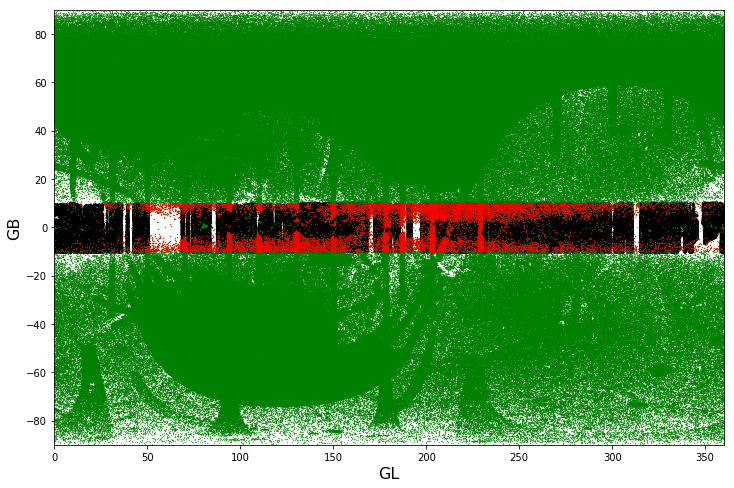

In [9]:
plt.figure(figsize=(4*3,4*2))

xrange=[0,360]
yrange=[-90,90]

plt.xlim(xrange[0],xrange[1]) 
plt.ylim(yrange[0],yrange[1])


sc2 = plt.scatter(cgaps.galactic.l,cgaps.galactic.b,marker='.',s=0.3,color='black')
sc = plt.scatter(c.galactic.l,c.galactic.b,marker='.',s=0.3,color='green')
sc = plt.scatter(c.galactic.l[p],c.galactic.b[p],marker='.',s=0.3,color='red')
#plt.plot(nuvg_ax,mnuv_ax,color='y',alpha=1,lw=3)
plt.xlabel('GL',fontsize=16) 
plt.ylabel('GB',fontsize=16) 

plt.show()

In [ ]:
plt.figure(figsize=(4*3,4*2))

xrange=[0,360]
yrange=[-90,90]

plt.xlim(xrange[0],xrange[1]) 
plt.ylim(yrange[0],yrange[1])


sc2=plt.scatter(uvgaps['ALPHA_J2000'],uvgaps['DELTA_J2000'],marker='.',s=0.3,color='black')
sc=plt.scatter(sdssQSO['RAJ2000'][p],sdssQSO['DEJ2000'][p],marker='.',s=0.3,color='red')
#plt.plot(nuvg_ax,mnuv_ax,color='y',alpha=1,lw=3)
plt.xlabel('RA',fontsize=16) 
plt.ylabel('DEC',fontsize=16) 

plt.show()

In [ ]:
plt.figure(figsize=(4*3,4*2))

xrange=[0,360]
yrange=[-90,90]

plt.xlim(xrange[0],xrange[1]) 
plt.ylim(yrange[0],yrange[1])


sc2=plt.scatter(uvgaps['ALPHA_J2000'],uvgaps['DELTA_J2000'],marker='.',s=0.3,color='black')
sc=plt.scatter(sdssQSO['RAJ2000'],sdssQSO['DEJ2000'],marker='.',s=0.3,color='red')
#plt.plot(nuvg_ax,mnuv_ax,color='y',alpha=1,lw=3)
plt.xlabel('RA',fontsize=16) 
plt.ylabel('DEC',fontsize=16) 

plt.show()

In [10]:
csub = SkyCoord(ra=sdssQSO['RAJ2000'][p]*u.degree, dec=sdssQSO['DEJ2000'][p]*u.degree)  
idx, d2d,d3d = csub.match_to_catalog_sky(cgaps,nthneighbor=1)  


In [11]:
rad = 5.0
pbin = np.where((d2d.arcsec < rad))
print "Number of matches:",d2d[pbin].shape
print d2d.arcsec[pbin]

Number of matches: (77,)
[0.22417973 0.19295272 0.4581602  0.58780064 0.3249846  0.19604549
 0.24309815 0.08864532 0.64875407 0.59187384 0.45977703 1.06012233
 0.18916847 3.03371919 0.64110558 0.42873857 0.60821129 0.97662792
 0.32173788 0.52990666 0.70581138 0.60217511 0.28737691 0.60159774
 0.56605002 0.16962458 0.06075914 0.18736733 0.66128827 1.48101437
 0.63442482 0.36408058 0.28218868 0.59128476 0.50158354 0.36176833
 0.66264154 0.63982522 0.75633409 0.54233177 0.81333416 0.60053814
 0.10150109 1.68981255 0.88628142 0.50755783 0.31144423 0.80143315
 0.02059295 0.17927726 0.82649139 1.00820074 0.90165507 0.45297688
 0.94554471 0.35955053 1.12181448 0.79662945 0.9422089  0.31797006
 0.61149635 1.25611926 0.29406501 1.78381361 0.29389035 0.16852546
 0.18104553 1.42333022 0.11459522 0.33011199 0.53341438 0.55149018
 0.38527801 0.62833225 0.31771632 0.71057181 0.90118657]


In [12]:
nqso=d2d[pbin].shape[0]

text_file = open("QSOlist_Galactic_Plane.csv", "w")
print "RA          DEC      GL     GB      Z         NUV    BP      NUV-BP  EB-V     PAR   PAR_SN"
text_file.write("RA,          DEC,      GL,     GB,      Z,         NUV,    BP,      NUV-BP,  EB-V,     PAR,   PAR_SN\n")

for i in np.arange(nqso):
    data = dict(ra=sdssQSO['RAJ2000'][p][pbin][i],dec=sdssQSO['DEJ2000'][p][pbin][i],sdssgb=gb[p][pbin][i],sdssgl=gl[p][pbin][i],sdssz=sdssQSO['Z'][p][pbin][i],bmag=uvgaps['phot_bp_mean_mag'][idx][pbin][i],nuv=uvgaps['nuv'][idx][pbin][i],nmb=uvgaps['nuv'][idx][pbin][i]-uvgaps['phot_bp_mean_mag'][idx][pbin][i],ebv=uvgaps['ebv'][idx][pbin][i],parallax=uvgaps['parallax'][idx][pbin][i],psn=uvgaps['parallax'][idx][pbin][i]/uvgaps['parallax_error'][idx][pbin][i])
    print "{ra:9.4f} {dec:9.4f} {sdssgl:6.1f}{sdssgb:6.1f} {sdssz:8.3f}    {nuv:6.2f} {bmag:6.2f} {nmb:6.2f}  {ebv:6.2f}   {parallax:6.2f} {psn:6.1f}".format(**data),"{0:6.2f}".format(sdssQSO['bmag'][p][pbin][i]-uvgaps['phot_bp_mean_mag'][idx][pbin][i]),sdssQSO['Qpct'][p][pbin][i],sdssQSO['Cl'][p][pbin][i],sdssQSO['r_Name'][p][pbin][i]
    text_file.write("{ra:9.4f}, {dec:9.4f}, {sdssgl:6.1f},{sdssgb:6.1f}, {sdssz:8.3f},    {nuv:6.2f}, {bmag:6.2f}, {nmb:6.2f},  {ebv:6.2f},   {parallax:6.2f}, {psn:6.1f}\n".format(**data))   

text_file.close()

RA          DEC      GL     GB      Z         NUV    BP      NUV-BP  EB-V     PAR   PAR_SN
   5.8533   60.8509  119.5  -1.8    0.100     16.25  13.05   3.20    0.92     0.34   11.7   1.43 92

KeyError: "Key 'Cl' does not exist."

In [35]:

pptmp=np.where((sdssQSO['DEJ2000'][p][pbin] > (-30)) & (uvgaps['parallax'][idx][pbin]<0.5) & (uvgaps['nuv'][idx][pbin] < 18.75) & (sdssQSO['Z'][p][pbin] < 2))
pp=pptmp[0]


nqso=d2d[pbin][pp].shape[0]
print nqso
text_file = open("QSOlist_Galactic_Plane_cut.csv", "w")
print "RA          DEC      GL     GB      Z         NUV    BP      NUV-BP  EB-V     PAR   PAR_SN"
text_file.write("RA,          DEC,      GL,     GB,      Z,         NUV,    BP,      NUV-BP,  EB-V,     PAR,   PAR_SN\n")

for i in np.arange(nqso):
    data = dict(ra=sdssQSO['RAJ2000'][p][pbin][pp][i],dec=sdssQSO['DEJ2000'][p][pbin][pp][i],sdssgb=gb[p][pbin][pp][i],sdssgl=gl[p][pbin][pp][i],sdssz=sdssQSO['Z'][p][pbin][pp][i],bmag=uvgaps['phot_bp_mean_mag'][idx][pbin][pp][i],nuv=uvgaps['nuv'][idx][pbin][pp][i],nmb=uvgaps['nuv'][idx][pbin][pp][i]-uvgaps['phot_bp_mean_mag'][idx][pbin][pp][i],ebv=uvgaps['ebv'][idx][pbin][pp][i],parallax=uvgaps['parallax'][idx][pbin][pp][i],psn=uvgaps['parallax'][idx][pbin][pp][i]/uvgaps['parallax_error'][idx][pbin][pp][i])
    print "{ra:9.4f} {dec:9.4f} {sdssgl:6.1f}{sdssgb:6.1f} {sdssz:8.3f}    {nuv:6.2f} {bmag:6.2f} {nmb:6.2f}  {ebv:6.2f}   {parallax:6.2f} {psn:6.1f}".format(**data),"{0:6.2f}".format(sdssQSO['bmag'][p][pbin][pp][i]-uvgaps['phot_bp_mean_mag'][idx][pbin][pp][i]),sdssQSO['Qpct'][p][pbin][pp][i],sdssQSO['Cl'][p][pbin][pp][i],sdssQSO['r_Name'][p][pbin][pp][i]
    text_file.write("{ra:9.4f}, {dec:9.4f}, {sdssgl:6.1f},{sdssgb:6.1f}, {sdssz:8.3f},    {nuv:6.2f}, {bmag:6.2f}, {nmb:6.2f},  {ebv:6.2f},   {parallax:6.2f}, {psn:6.1f}\n".format(**data))   

    
    
    
    
text_file.close()

22
RA          DEC      GL     GB      Z         NUV    BP      NUV-BP  EB-V     PAR   PAR_SN
   5.8532   60.8510  119.5  -1.8    0.100     16.50  13.05   3.45    0.92     0.34   11.7   1.43 92 q WISEA
  34.8964   53.6722  135.9  -7.0    0.600     17.26  13.69   3.57    0.19     0.30   11.6   0.04 92 q WISEA
  35.5263   52.3517  136.7  -8.1    0.200     18.37  17.62   0.74    0.13     0.00    0.0  -0.42 90 A HMQ
 102.6287  -19.9914  230.8  -9.2    0.026     18.59  17.49   1.10    0.17     0.47    1.7  -3.71 0 A PGC
 105.0020   15.3812  200.1   8.8    1.300     18.06  17.47   0.59    0.05     0.07    0.5  -0.62 100 q WISEA
 105.4150    8.5048  206.5   6.1    1.000     18.24  18.01   0.23    0.08     0.11    0.6  -1.53 99 q WISEA
 105.7589   15.9599  199.9   9.7    0.800     18.52  17.78   0.74    0.02     0.06    0.4   0.37 100 q WISEA
 107.2641    9.5857  206.3   8.2    0.600     18.46  17.61   0.85    0.04     0.46    3.3  -0.39 100 q WISEA
 107.9142   -2.6271  217.6   3.3    0.300   

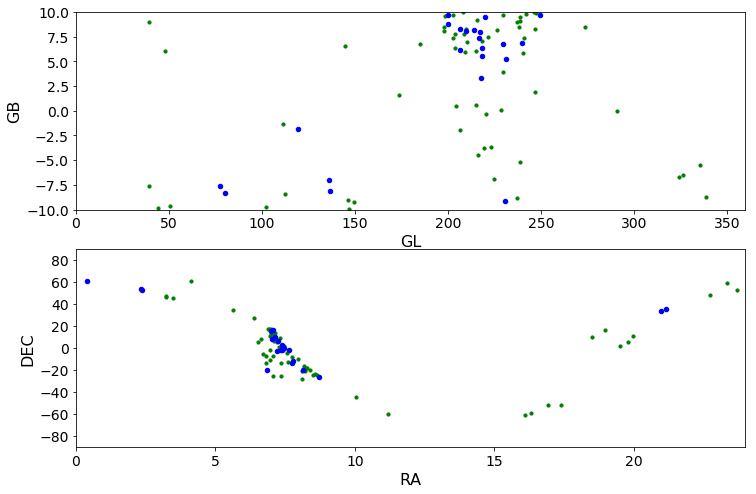

In [43]:
pptmp=np.where((sdssQSO['DEJ2000'][p][pbin] > (-30)) & (uvgaps['parallax'][idx][pbin]<0.5) & (uvgaps['nuv'][idx][pbin] < 18.75) & (sdssQSO['Z'][p][pbin] < 2))
pp=pptmp[0]



fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(4*3,4*2))

xrange=[0,360]
yrange=[-10,10]

ax1.set_xlim(xrange[0],xrange[1]) 
ax1.set_ylim(yrange[0],yrange[1])

#sc2=plt.scatter(cgaps.galactic.l,cgaps.galactic.b,marker='.',s=0.3,color='black')
sc=ax1.scatter(c.galactic.l[p][pbin],c.galactic.b[p][pbin],marker='o',s=10.0,color='green')
sc=ax1.scatter(c.galactic.l[p][pbin][pp],c.galactic.b[p][pbin][pp],marker='o',s=20.0,color='blue')
#sc=plt.scatter(c.galactic.l[p],c.galactic.b[p],marker='.',s=0.3,color='red')
#plt.plot(nuvg_ax,mnuv_ax,color='y',alpha=1,lw=3)
ax1.set_xlabel('GL',fontsize=16) 
ax1.set_ylabel('GB',fontsize=16) 

for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(14)


xrange=[0,24]
yrange=[-90,90]

ax2.set_xlim(xrange[0],xrange[1]) 
ax2.set_ylim(yrange[0],yrange[1])

#sc2=plt.scatter(cgaps.galactic.l,cgaps.galactic.b,marker='.',s=0.3,color='black')
sc=ax2.scatter(c.ra[p][pbin]/15.0,c.dec[p][pbin],marker='o',s=10.0,color='green')
sc=ax2.scatter(c.ra[p][pbin][pp]/15.0,c.dec[p][pbin][pp],marker='o',s=20.0,color='blue')
#sc=plt.scatter(c.galactic.l[p],c.galactic.b[p],marker='.',s=0.3,color='red')
#plt.plot(nuvg_ax,mnuv_ax,color='y',alpha=1,lw=3)
ax2.set_xlabel('RA',fontsize=16) 
ax2.set_ylabel('DEC',fontsize=16) 

for item in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(14)


plt.savefig("qso_uvgaps_skydist.png")
plt.savefig("qso_uvgaps_skydist.eps")
plt.show()


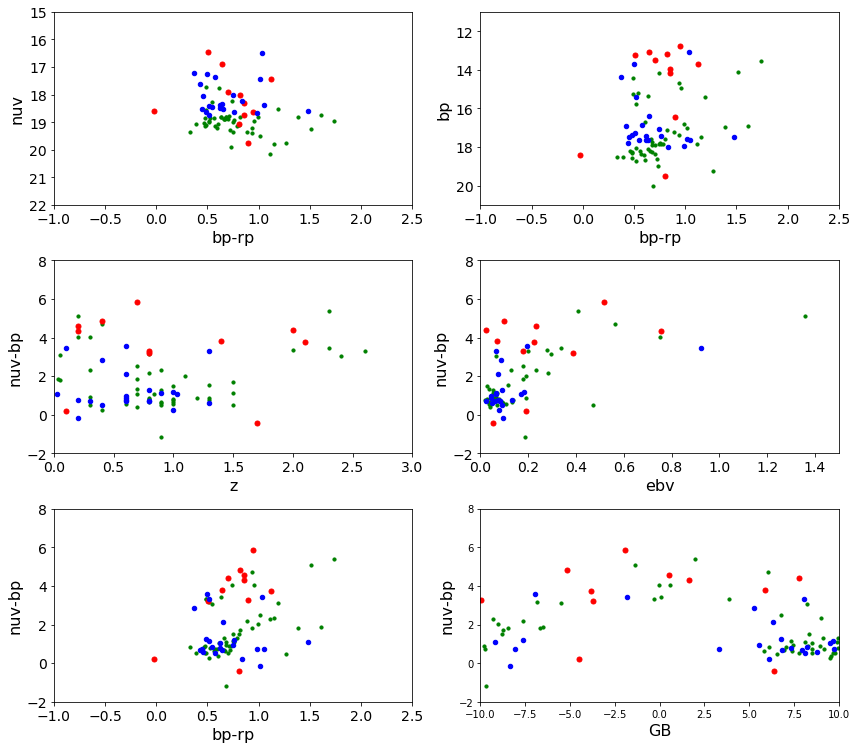

In [53]:
pptmp=np.where((sdssQSO['DEJ2000'][p][pbin] > (-30)) & (uvgaps['parallax'][idx][pbin]<0.5) & (uvgaps['nuv'][idx][pbin] < 18.75) & (sdssQSO['Z'][p][pbin] < 2))
pp=pptmp[0]



fig, axes = plt.subplots(3, 2,figsize=(4*3,3.5*3))
#plt.subplots_adjust(left=0.1, right=0.9, top=1, bottom=0.0)


ax1=axes[0,0]
ax2=axes[0,1]
ax3=axes[1,0]
ax4=axes[1,1]
ax5=axes[2,0]
ax6=axes[2,1]


xrange=[-1,2.5]
yrange=[22,15]

ax1.set_xlim(xrange[0],xrange[1]) 
ax1.set_ylim(yrange[0],yrange[1])

bprp=uvgaps['phot_bp_mean_mag'][idx][pbin]-uvgaps['phot_rp_mean_mag'][idx][pbin]
nuvbp=uvgaps['nuv'][idx][pbin]-uvgaps['phot_bp_mean_mag'][idx][pbin]

rp=uvgaps['phot_rp_mean_mag'][idx][pbin]
bp=uvgaps['phot_bp_mean_mag'][idx][pbin]
nuv=uvgaps['nuv'][idx][pbin]
ebv=uvgaps['ebv'][idx][pbin]
parallax=uvgaps['parallax'][idx][pbin]
ppx=np.where(parallax > 0.5)


#sc2=plt.scatter(cgaps.galactic.l,cgaps.galactic.b,marker='.',s=0.3,color='black')
sc=ax1.scatter(bprp,nuv,marker='o',s=10.0,color='green')
sc=ax1.scatter(bprp[ppx],nuv[ppx],marker='o',s=25.0,color='red')
sc=ax1.scatter(bprp[pp],nuv[pp],marker='o',s=20.0,color='blue')
#sc=plt.scatter(c.galactic.l[p],c.galactic.b[p],marker='.',s=0.3,color='red')
#plt.plot(nuvg_ax,mnuv_ax,color='y',alpha=1,lw=3)
ax1.set_xlabel('bp-rp',fontsize=16) 
ax1.set_ylabel('nuv',fontsize=16) 


for item in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(14)

xrange=[-1,2.5]
yrange=[21,11]


ax2.set_xlim(xrange[0],xrange[1]) 
ax2.set_ylim(yrange[0],yrange[1])



#sc2=plt.scatter(cgaps.galactic.l,cgaps.galactic.b,marker='.',s=0.3,color='black')
sc=ax2.scatter(bprp,bp,marker='o',s=10.0,color='green')
sc=ax2.scatter(bprp[ppx],bp[ppx],marker='o',s=25.0,color='red')
sc=ax2.scatter(bprp[pp],bp[pp],marker='o',s=20.0,color='blue')
#sc=plt.scatter(c.galactic.l[p],c.galactic.b[p],marker='.',s=0.3,color='red')
#plt.plot(nuvg_ax,mnuv_ax,color='y',alpha=1,lw=3)
ax2.set_xlabel('bp-rp',fontsize=16) 
ax2.set_ylabel('bp',fontsize=16) 


for item in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(14)


xrange=[0,3]
yrange=[-2,8]

ax3.set_xlim(xrange[0],xrange[1]) 
ax3.set_ylim(yrange[0],yrange[1])


#sc2=plt.scatter(cgaps.galactic.l,cgaps.galactic.b,marker='.',s=0.3,color='black')
sc=ax3.scatter(sdssQSO['z'][p][pbin],nuvbp,marker='o',s=10.0,color='green')
sc=ax3.scatter(sdssQSO['z'][p][pbin][ppx],nuvbp[ppx],marker='o',s=25.0,color='red')
sc=ax3.scatter(sdssQSO['z'][p][pbin][pp],nuvbp[pp],marker='o',s=20.0,color='blue')
#sc=plt.scatter(c.galactic.l[p],c.galactic.b[p],marker='.',s=0.3,color='red')
#plt.plot(nuvg_ax,mnuv_ax,color='y',alpha=1,lw=3)
ax3.set_xlabel('z',fontsize=16) 
ax3.set_ylabel('nuv-bp',fontsize=16) 

for item in (ax3.get_xticklabels() + ax3.get_yticklabels()):
    item.set_fontsize(14)


xrange=[0,1.5]
yrange=[-2,8]

ax4.set_xlim(xrange[0],xrange[1]) 
ax4.set_ylim(yrange[0],yrange[1])


#sc2=plt.scatter(cgaps.galactic.l,cgaps.galactic.b,marker='.',s=0.3,color='black')
sc=ax4.scatter(uvgaps['ebv'][idx][pbin],nuvbp,marker='o',s=10.0,color='green')
sc=ax4.scatter(uvgaps['ebv'][idx][pbin][ppx],nuvbp[ppx],marker='o',s=25.0,color='red')
sc=ax4.scatter(uvgaps['ebv'][idx][pbin][pp],nuvbp[pp],marker='o',s=20.0,color='blue')
#sc=plt.scatter(c.galactic.l[p],c.galactic.b[p],marker='.',s=0.3,color='red')
#plt.plot(nuvg_ax,mnuv_ax,color='y',alpha=1,lw=3)
ax4.set_xlabel('ebv',fontsize=16) 
ax4.set_ylabel('nuv-bp',fontsize=16) 

for item in (ax4.get_xticklabels() + ax4.get_yticklabels()):
    item.set_fontsize(14)


xrange=[-1,2.5]
yrange=[-2,8]

ax5.set_xlim(xrange[0],xrange[1]) 
ax5.set_ylim(yrange[0],yrange[1])

#sc2=plt.scatter(cgaps.galactic.l,cgaps.galactic.b,marker='.',s=0.3,color='black')
sc=ax5.scatter(bprp,nuvbp,marker='o',s=10.0,color='green')
sc=ax5.scatter(bprp[ppx],nuvbp[ppx],marker='o',s=25.0,color='red')
sc=ax5.scatter(bprp[pp],nuvbp[pp],marker='o',s=20.0,color='Blue')
#sc=plt.scatter(c.galactic.l[p],c.galactic.b[p],marker='.',s=0.3,color='red')
#plt.plot(nuvg_ax,mnuv_ax,color='y',alpha=1,lw=3)
ax5.set_xlabel('bp-rp',fontsize=16) 
ax5.set_ylabel('nuv-bp',fontsize=16) 

for item in (ax5.get_xticklabels() + ax5.get_yticklabels()):
    item.set_fontsize(14)
    
xrange=[-10,10]
yrange=[-2,8]

ax6.set_xlim(xrange[0],xrange[1]) 
ax6.set_ylim(yrange[0],yrange[1])



#sc2=plt.scatter(cgaps.galactic.l,cgaps.galactic.b,marker='.',s=0.3,color='black')
sc=ax6.scatter(c.galactic.b[p][pbin],nuvbp,marker='o',s=10.0,color='green')
sc=ax6.scatter(c.galactic.b[p][pbin][ppx],nuvbp[ppx],marker='o',s=25.0,color='red')
sc=ax6.scatter(c.galactic.b[p][pbin][pp],nuvbp[pp],marker='o',s=20.0,color='blue')
#sc=plt.scatter(c.galactic.l[p],c.galactic.b[p],marker='.',s=0.3,color='red')
#plt.plot(nuvg_ax,mnuv_ax,color='y',alpha=1,lw=3)
ax6.set_xlabel('GB',fontsize=16) 
ax6.set_ylabel('nuv-bp',fontsize=16) 


for item in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    item.set_fontsize(14)


fig.tight_layout()


plt.savefig("qso_uvgaps_props.png")
plt.savefig("qso_uvgaps_props.eps")

plt.show()

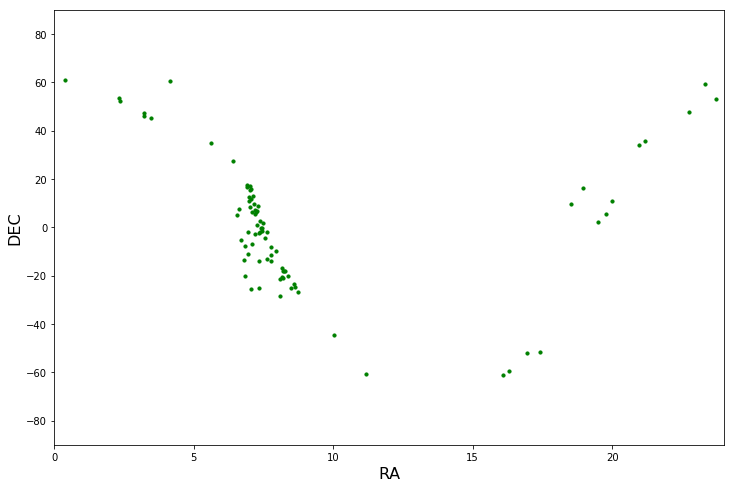

In [52]:
plt.figure(figsize=(4*3,4*2))

xrange=[0,24]
yrange=[-90,90]

plt.xlim(xrange[0],xrange[1]) 
plt.ylim(yrange[0],yrange[1])


#sc2=plt.scatter(cgaps.galactic.l,cgaps.galactic.b,marker='.',s=0.3,color='black')
sc=plt.scatter(c.ra[p][pbin]/15.0,c.dec[p][pbin],marker='o',s=10.0,color='green')
#sc=plt.scatter(c.galactic.l[p],c.galactic.b[p],marker='.',s=0.3,color='red')
#plt.plot(nuvg_ax,mnuv_ax,color='y',alpha=1,lw=3)
plt.xlabel('RA',fontsize=16) 
plt.ylabel('DEC',fontsize=16) 

plt.show()

In [ ]:
pbin6=np.where((d2d6.arcsec < rad))
print "Number of matches:",d2d6[pbin].shape

pbin5=np.where((d2d5.arcsec < rad))
print "Number of matches:",d2d5[pbin].shape



plt.figure(figsize=(4*3,4*2))

xrange=[227,228.5]
yrange=[32,33]

plt.xlim(xrange[0],xrange[1]) 
plt.ylim(yrange[0],yrange[1])

ssz=100

sc=plt.scatter(sdssQSO['RA'][p],sdssQSO['DEC'][p],marker='+',s=ssz,color='black')
sc=plt.scatter(sdssQSO['RA'][p][pbin5],sdssQSO['DEC'][p][pbin5],alpha=0.25,marker='o',s=ssz,color='green')
sc=plt.scatter(sdssQSO['RA'][p][pbin6],sdssQSO['DEC'][p][pbin6],alpha=0.25,marker='o',s=ssz,color='red')
#plt.plot(nuvg_ax,mnuv_ax,color='y',alpha=1,lw=3)
plt.xlabel('RA',fontsize=16) 
plt.ylabel('DEC',fontsize=16) 

plt.show()

pbin6=np.where((d2d6.arcsec < rad))
print "Number of matches:",d2d6[pbin].shape

pbin5=np.where((d2d5.arcsec < rad))
print "Number of matches:",d2d5[pbin].shape



In [ ]:
pbin6=np.where((d2d6.arcsec < rad))
print "Number of matches:",d2d6[pbin6].shape

pbin5=np.where((d2d5.arcsec < rad))
print "Number of matches:",d2d5[pbin5].shape


fig=plt.figure(figsize=(15,60))
for ptr in np.arange(d2d6[pbin6].shape[0]):
#    print sdssQSO['RA'][p][pbin6][ptr],sdssQSO['DEC'][p][pbin6][ptr]
    ax=plt.subplot(25,3,ptr+1) 
    xrg=[sdssQSO['RAJ2000'][p][pbin6][ptr]-0.5,sdssQSO['RAJ2000'][p][pbin6][ptr]+0.5]
    yrg=[sdssQSO['DEJ2000'][p][pbin6][ptr]-0.5,sdssQSO['DEJ2000'][p][pbin6][ptr]+0.5]
    ax.set_xlim([xrg[0],xrg[1]]) 
    ax.set_ylim([yrg[0],yrg[1]])
    pp=np.where((sdssQSO['RAJ2000'][p] > xrg[0]) & (sdssQSO['RAJ2000'][p] < xrg[1]) & (sdssQSO['DEJ2000'][p] > yrg[0]) & (sdssQSO['DEJ2000'][p] < yrg[1]))
    nqsosub=len(sdssQSO['RAJ2000'][p][pp])
    precision=3
    for jj in np.arange(nqsosub):
        ax.text(sdssQSO['RAJ2000'][p][pp][jj],sdssQSO['DEJ2000'][p][pp][jj],"{:.{}f}".format(sdssQSO['Z'][p][pp][jj],precision))
    ssz=40
    ax.scatter(sdssQSO['RAJ2000'][p],sdssQSO['DEJ2000'][p],marker='+',s=10,color='black')
    ax.scatter(sdssQSO['RAJ2000'][p][pbin5],sdssQSO['DEJ2000'][p][pbin5],alpha=0.25,marker='o',s=ssz,color='green')
    ax.scatter(sdssQSO['RAJ2000'][p][pbin6],sdssQSO['DEJ2000'][p][pbin6],alpha=0.25,marker='o',s=ssz,color='red')
#plt.plot(nuvg_ax,mnuv_ax,color='y',alpha=1,lw=3)
    ax.set_xlabel('RA',fontsize=10) 
    ax.set_ylabel('DEC',fontsize=10)

plt.show()





In [ ]:
pbin6=np.where((d2d6.arcsec < rad))
print "Number of matches:",d2d6[pbin6].shape

pbin5=np.where((d2d5.arcsec < rad))
print "Number of matches:",d2d5[pbin5].shape
precision2=5

text_file = open("QSOlist_multiples_new.txt", "w")
for ptr in np.arange(d2d6[pbin6].shape[0]):
#    print sdssQSO['RA'][p][pbin6][ptr],sdssQSO['DEC'][p][pbin6][ptr]    
    xrg=[sdssQSO['RAJ2000'][p][pbin6][ptr]-0.5,sdssQSO['RAJ2000'][p][pbin6][ptr]+0.5]
    yrg=[sdssQSO['DEJ2000'][p][pbin6][ptr]-0.5,sdssQSO['DEJ2000'][p][pbin6][ptr]+0.5]
    pp=np.where((sdssQSO['RAJ2000'][p] > xrg[0]) & (sdssQSO['RAJ2000'][p] < xrg[1]) & (sdssQSO['DEJ2000'][p] > yrg[0]) & (sdssQSO['DEJ2000'][p] < yrg[1]))
    nqsosub=len(sdssQSO['RAJ2000'][p][pp])
    print
    text_file.write("\n")
    print "Field Center (RA, DEC J2000):","{:.{}f}".format(sdssQSO['RAJ2000'][p][pbin6][ptr],precision2),"{:.{}f}".format(sdssQSO['DEJ2000'][p][pbin6][ptr],precision2)
    text_file.write("Field Center (RA, DEC J2000): "+"{:.{}f}".format(sdssQSO['RAJ2000'][p][pbin6][ptr],precision2)+" "+"{:.{}f}".format(sdssQSO['DEJ2000'][p][pbin6][ptr],precision2)+"\n")
    for jj in np.arange(nqsosub):
        print "{:.{}f}".format(sdssQSO['RAJ2000'][p][pp][jj],precision2),"{:.{}f}".format(sdssQSO['DEJ2000'][p][pp][jj],precision2),"{:.{}f}".format(sdssQSO['Z'][p][pp][jj],precision),"{:.{}f}".format(sdssQSO['Bmag'][p][pp][jj],precision),"{:.{}f}".format(sdssQSO['Rmag'][p][pp][jj],precision)
#        text_file.write("{:.{}f}".format(sdssQSO['RAJ2000'][p][pp][jj],precision2)+" "+"{:.{}f}".format(sdssQSO['DEJ2000'][p][pp][jj],precision2)+" "+"{:.{}f}".format(sdssQSO['Z'][p][pp][jj],precision)+"\n")
        text_file.write("{:.{}f}".format(sdssQSO['RAJ2000'][p][pp][jj],precision2)+" "+"{:.{}f}".format(sdssQSO['DEJ2000'][p][pp][jj],precision2)+" "+"{:.{}f}".format(sdssQSO['Z'][p][pp][jj],precision)+" "+"{:.{}f}".format(sdssQSO['Bmag'][p][pp][jj],precision)+" "+"{:.{}f}".format(sdssQSO['Rmag'][p][pp][jj],precision)+"\n")

text_file.close()





In [ ]:
# If looking at close matches doubles
pbin2=np.where((d2d2.arcsec < rad))
print "Number of matches:",d2d2[pbin2].shape



fig=plt.figure(figsize=(15,60))
for ptr in np.arange(d2d2[pbin2].shape[0]):
#    print sdssQSO['RA'][p][pbin6][ptr],sdssQSO['DEC'][p][pbin6][ptr]
    ax=plt.subplot(25,3,ptr+1) 
    
    xrg=[sdssQSO['RAJ2000'][p][pbin2][ptr]-0.02,sdssQSO['RAJ2000'][p][pbin2][ptr]+0.02]
    yrg=[sdssQSO['DEJ2000'][p][pbin2][ptr]-0.02,sdssQSO['DEJ2000'][p][pbin2][ptr]+0.02]
    ax.set_xlim([xrg[0],xrg[1]]) 
    ax.set_ylim([yrg[0],yrg[1]])
    pp=np.where((sdssQSO['RAJ2000'][p] > xrg[0]) & (sdssQSO['RAJ2000'][p] < xrg[1]) & (sdssQSO['DEJ2000'][p] > yrg[0]) & (sdssQSO['DEJ2000'][p] < yrg[1]))
    nqsosub=len(sdssQSO['RAJ2000'][p][pp])
    for jj in np.arange(nqsosub):
        ax.text(sdssQSO['RAJ2000'][p][pp][jj],sdssQSO['DEJ2000'][p][pp][jj],sdssQSO['Z'][p][pp][jj])
    ssz=40
    ax.scatter(sdssQSO['RAJ2000'][p],sdssQSO['DEJ2000'][p],marker='+',s=10,color='black')
    ax.scatter(sdssQSO['RAJ2000'][p][pbin2],sdssQSO['DEJ2000'][p][pbin2],alpha=0.25,marker='o',s=ssz,color='red')
#plt.plot(nuvg_ax,mnuv_ax,color='y',alpha=1,lw=3)
    ax.set_xlabel('RAJ2000',fontsize=10) 
    ax.set_ylabel('DEJ2000',fontsize=10) 

plt.show()




In [ ]:
# If looking at close matches doubles
pbin2=np.where((d2d2.arcsec < rad))
print "Number of matches:",d2d2[pbin2].shape

pbin2=np.where((d2d3.arcsec < rad))
print "Number of matches:",d2d3[pbin2].shape



fig=plt.figure(figsize=(15,60))
for ptr in np.arange(d2d3[pbin2].shape[0]):
#    print sdssQSO['RA'][p][pbin6][ptr],sdssQSO['DEC'][p][pbin6][ptr]
    ax=plt.subplot(25,3,ptr+1) 
    
    xrg=[sdssQSO['RAJ2000'][p][pbin2][ptr]-0.1,sdssQSO['RAJ2000'][p][pbin2][ptr]+0.1]
    yrg=[sdssQSO['DEJ2000'][p][pbin2][ptr]-0.1,sdssQSO['DEJ2000'][p][pbin2][ptr]+0.1]
    ax.set_xlim([xrg[0],xrg[1]]) 
    ax.set_ylim([yrg[0],yrg[1]])
    pp=np.where((sdssQSO['RAJ2000'][p] > xrg[0]) & (sdssQSO['RAJ2000'][p] < xrg[1]) & (sdssQSO['DEJ2000'][p] > yrg[0]) & (sdssQSO['DEJ2000'][p] < yrg[1]))
    nqsosub=len(sdssQSO['RAJ2000'][p][pp])
    for jj in np.arange(nqsosub):
        ax.text(sdssQSO['RAJ2000'][p][pp][jj],sdssQSO['DEJ2000'][p][pp][jj],sdssQSO['Z'][p][pp][jj])
    ssz=40
    ax.scatter(sdssQSO['RAJ2000'][p],sdssQSO['DEJ2000'][p],marker='+',s=10,color='black')
    ax.scatter(sdssQSO['RAJ2000'][p][pbin2],sdssQSO['DEJ2000'][p][pbin2],alpha=0.25,marker='o',s=ssz,color='red')
#plt.plot(nuvg_ax,mnuv_ax,color='y',alpha=1,lw=3)
    ax.set_xlabel('RAJ2000',fontsize=10) 
    ax.set_ylabel('DEJ2000',fontsize=10) 

plt.show()





In [ ]:
p2=np.where((sdssQSO['Z']>zrange[0]) & (sdssQSO['Z']<zrange[1]) & (sdssQSO['RA'] > 227) & (sdssQSO['RA'] < 228.5) & (sdssQSO['DEC'] > 32)& (sdssQSO['DEC'] < 33))

for i in np.arange(6): 
   print sdssQSO[p2][i]['Z'] 
   print sdssQSO[p2][i]['RA']
   print sdssQSO[p2][i]['DEC']

In [ ]:
for i in np.arange(6): 
    print sdssQSO[p2][i]['Z'], sdssQSO[p2][i]['RA'], sdssQSO[p2][i]['DEC']
    
r1=((sdssQSO[p2][0]['RA']+sdssQSO[p2][1]['RA']+sdssQSO[p2][2]['RA'])/3)
d1=((sdssQSO[p2][0]['DEC']+sdssQSO[p2][1]['DEC']+sdssQSO[p2][2]['DEC'])/3)
from astropy import units as u
from astropy.coordinates import Angle
r=Angle(r1,u.degree)
d=Angle(d1,u.degree)
print r.degree,d.degree
print r.to_string(unit=u.hour)
print d.to_string(unit=u.degree)



In [ ]:
print 1.647*1216

In [ ]:
print sdssQSO[p2][1]